# Spektralne metode grupiranja


Ova Jupyter bilježnica napravljena je u sklopu diplomskog rada "Spektralne metode grupiranja" i sadrži implementirane metode opisane u radu, kao i sve pripadne primjere.


Primjeri su organizirani u šest poglavlja koja prate strukturu poglavlja iz diplomskog rada.


In [259]:
import KVVALgorithm
import NJWAlgorithm
import SMAlgorithm
import KMeansAlogrithm
import importlib

import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from sklearn.datasets import make_blobs
from sympy import Matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

import warnings
warnings.filterwarnings("ignore")

# algoritam k-sredina
importlib.reload(KMeansAlogrithm)
KMeansCustom = KMeansAlogrithm.KMeansCustom

# metoda normaliziranog reza
importlib.reload(SMAlgorithm)
SpectralClusteringSM = SMAlgorithm.SpectralClusteringSM

# njw metoda
importlib.reload(NJWAlgorithm)
SpectralClusteringNJW = NJWAlgorithm.SpectralClusteringNJW

# metoda Cheegerove provodljivosti
importlib.reload(KVVALgorithm)
SpectralClusteringKVV = KVVALgorithm.SpectralClusteringKVV

# spektalno grupiranje temeljna metoda
import SpectralAlgorithm
importlib.reload(SpectralAlgorithm)
SpectralClustering = SpectralAlgorithm.SpectralClustering



## 1. Grupiranje podataka


korišteni podatci:


In [260]:
# skup od četiri točke - vrhovi kvadrata
data_4_points = np.array([[1, 1], [2, 1], [1, 2], [2, 2]])
# skup od 10 točak nasumično odabranih u rasponu [0, 10]
data_10_points = np.array([[2.5, 2.4],[9.8, 1.6],[4.5, 2.8],[7.6, 1.2],[3.8, 4.5],[0.7, 0.2],[7.6, 3.1],[3.7, 8.3],[7.7, 6.9],[9.8, 9.7]])

### 1.2. Konstrukcija matrice grafa


U klasi SpectralClustering implemenirane su i metode vezane uz matrice susjedstva i sličnosti

Slika 1.1 Potpuno povezani graf i pripadna matrica susjedstva

Matrica susjedstva:


Matrix([
[0, 1, 1, 1],
[1, 0, 1, 1],
[1, 1, 0, 1],
[1, 1, 1, 0]])

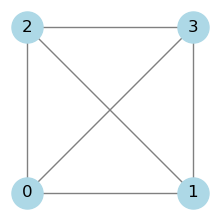

In [261]:
sc_4 = SpectralClustering(data_4_points)

""" matrica susjedstva potpuno povezanog grafa """
print('Matrica susjedstva:')
A_1 = sc_4.compute_adjacency_matrix()
display(Matrix(np.round(A_1, 2)))

"""graf na temelju matrice susjedstva"""
G_1 = nx.Graph()
n = len(data_4_points)
for i in range(n):
    G_1.add_node(i, pos=data_4_points[i])
for i in range(n):
    for j in range(i + 1, n):
        if A_1[i, j] == 1:
            G_1.add_edge(i, j)

""" vizalizacija grafa """
pos = nx.get_node_attributes(G_1, 'pos')
plt.figure(figsize=(2, 2))
nx.draw(G_1, pos, with_labels=True, node_color='lightblue', edge_color="gray", node_size=500)
plt.axis('equal')
plt.show()

Slika 1.2 Potpuno povezani graf i pripadna matrica sličnosti koristeći Euklidsku udaljenost

Matrica sličnosti prema euklidskoj udaljenosti:


Matrix([
[ 0.0,  1.0,  1.0, 0.71],
[ 1.0,  0.0, 0.71,  1.0],
[ 1.0, 0.71,  0.0,  1.0],
[0.71,  1.0,  1.0,  0.0]])

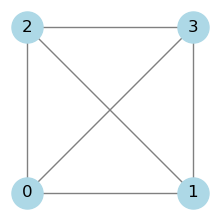

In [262]:
""" matrica susjedstva potpuno povezanog grafa """
print('Matrica sličnosti prema euklidskoj udaljenosti:')
A_2 = sc_4.compute_similarity_matrix_euclidian()
display(Matrix(np.round(A_2, 2)))

""" vizualizacija grafa """
G_2 = nx.Graph()
for i in range(n):
    G_2.add_node(i, pos=data_4_points[i])
for i in range(n):
    for j in range(i + 1, n):
        G_2.add_edge(i, j)

pos = nx.get_node_attributes(G_2, 'pos')
plt.figure(figsize=(2, 2))
nx.draw(G_2, pos, with_labels=True, node_color='lightblue', edge_color="gray", node_size=500)
plt.axis('equal')
plt.show()

Slika 1.3 Povezani graf i pripadna matrica sličnosti k-najbližih susjedstva; k= 3

Matrica susjedstva potpunog grafa:


Matrix([
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])

Matrica susjedstva k-NN (k=3):


Matrix([
[0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
[0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
[1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
[1, 0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 1, 1, 1, 0]])

Matrica sličnosti (udaljenosti):


Matrix([
[ 0.0,  0.0, 0.49,  0.0,  0.4, 0.35,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0, 0.18, 0.45,  0.0,  0.0, 0.38,  0.0,  0.0,  0.0],
[0.49,  0.0,  0.0,  0.0, 0.54,  0.0, 0.32,  0.0,  0.0,  0.0],
[ 0.0, 0.45, 0.29,  0.0,  0.0,  0.0, 0.53,  0.0,  0.0,  0.0],
[ 0.4,  0.0, 0.54,  0.0,  0.0,  0.0,  0.0, 0.26,  0.0,  0.0],
[0.35,  0.0, 0.22,  0.0, 0.19,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0, 0.38, 0.32, 0.53,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0, 0.18,  0.0, 0.26,  0.0,  0.0,  0.0, 0.24,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.26, 0.24,  0.0, 0.29],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 0.14, 0.16, 0.29,  0.0]])

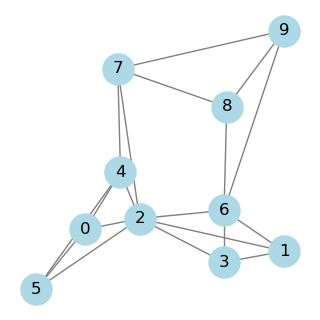

In [263]:
sc_10 = SpectralClustering(data_10_points)

""" # Matrica susjedstva """
sc_10.compute_adjacency_matrix()
print("Matrica susjedstva potpunog grafa:")
display(Matrix(np.round(sc_10.A, 2)))

""" k-nn matrica susjedstva """
k = 3
matrix_a = sc_10.compute_knn_adjacency_matrix(k)
print(f"Matrica susjedstva k-NN (k={k}):")
display(Matrix(np.round(matrix_a, 2)))


""" Matrica sličnosti  """
matrix_b = sc_10.compute_knn_similarity_matrix(k)
print("Matrica sličnosti (udaljenosti):")
display(Matrix(np.round(matrix_b, 2)))


""" vizualizacija grafa """
G_3 = nx.Graph()
for i in range(10):
    G_3.add_node(i, pos=data_10_points[i])
for i in range(10):
    for j in range(10):
        if matrix_a[i, j] == 1:
            similarity = matrix_b[i, j]
            G_3.add_edge(i, j, weight=similarity)

pos = nx.get_node_attributes(G_3, 'pos')
plt.figure(figsize=(3, 3))
nx.draw(G_3, pos, with_labels=True, node_color='lightblue', edge_color="gray", node_size=500)
plt.axis('equal')
plt.show()

## 2. Prikaz nekih osnovnih metoda grupiranja

### 2.1. Algoritam k-sredina

Slika 2.1 Prikaz ažuriranja središta kod algoritma k-sredina

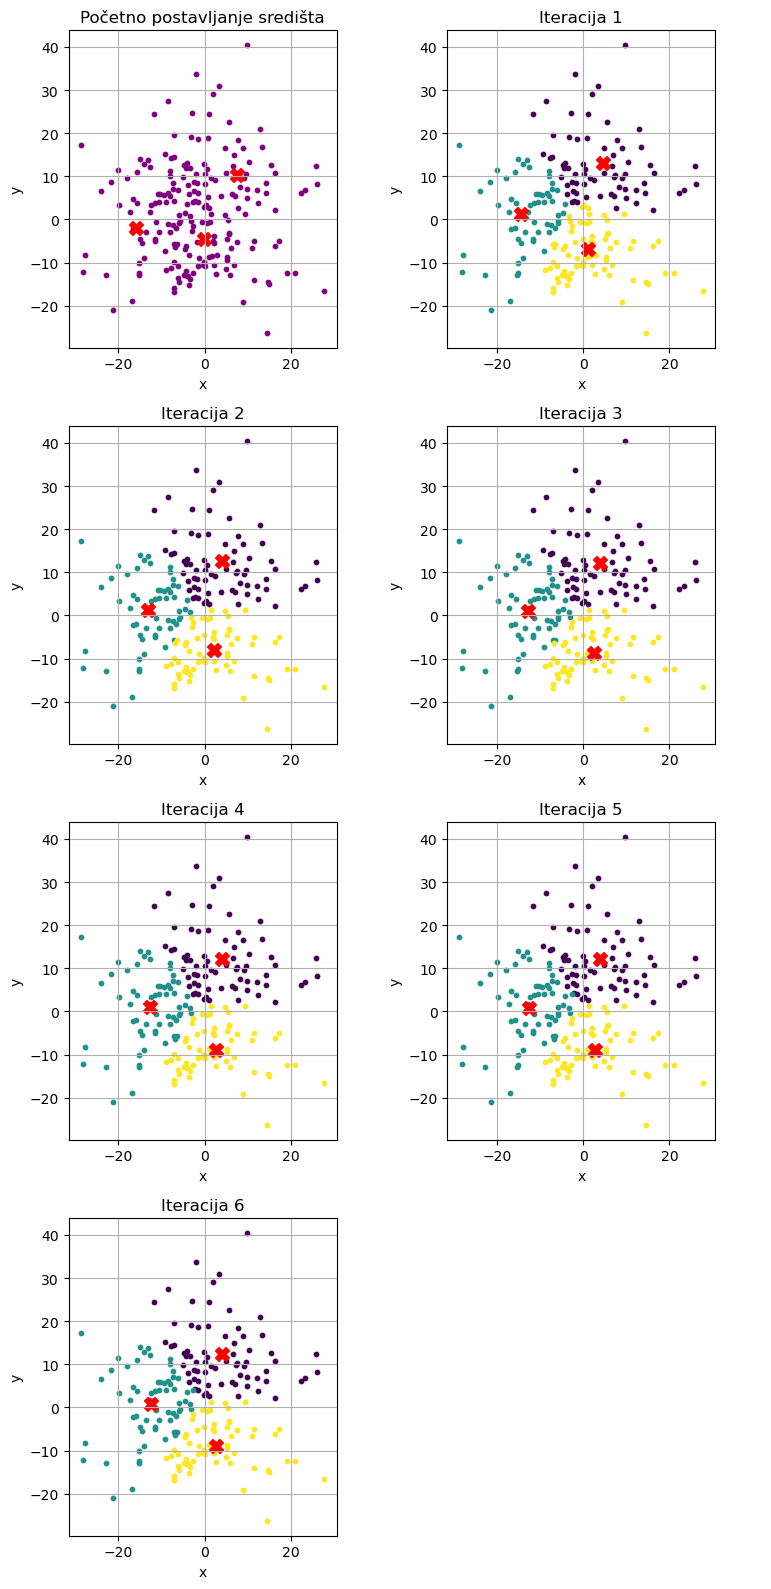

In [264]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import math

""" generiranje podataka """
X, y = make_blobs(n_samples=200, centers=3, cluster_std=10, random_state=42)
clusterer = KMeansCustom(data=X, n_clusters=3)
labels, history = clusterer.pipeline()

""" vizualizacija rezultata """
n_clusters = clusterer.n_clusters
colors = cm.get_cmap("viridis", n_clusters)
total_plots = len(clusterer.cluster_history)

cols = 2
rows = math.ceil(total_plots / cols)
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = np.array(axes).reshape(-1) 

for i in range(len(axes)):
    ax = axes[i]
    if i >= total_plots:
        ax.axis('off')
        continue

    clusters = clusterer.cluster_history[i]
    centroids = clusterer.centroid_history[i]
    for k in range(n_clusters):
        cluster_points = clusterer.data[np.array(clusters) == k]
        color = "purple" if i == 0 else colors(k)
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1],
                   s=10, color=color, label=f'Skupina {k}')

    ax.scatter(centroids[:, 0], centroids[:, 1],
               c='red', marker='X', s=100, label='Središta')
    if i == 0:
        ax.set_title("Početno postavljanje središta")
    else:
        ax.set_title(f"Iteracija {i}")
    ax.grid(True)
    ax.set_aspect('equal')
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.tight_layout()
plt.show()


Slika 2.2 Usporedba početnog postavljanja središta kod običnog algoritma k-sredina i naprednog algoritma k-sredina

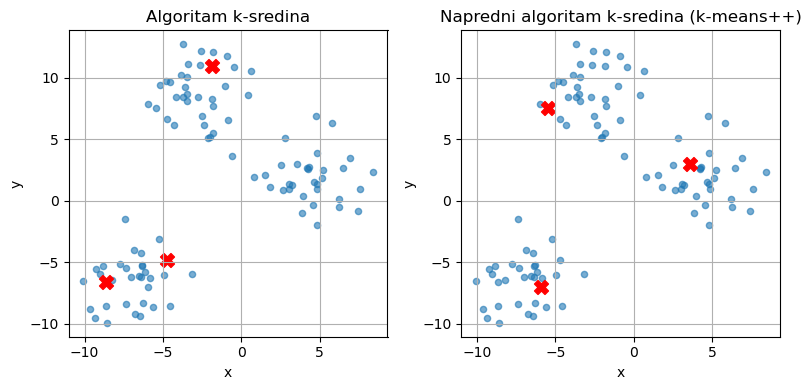

In [265]:
""" generiranje podataka """
k = 3
data_blobs_1, _ = make_blobs(n_samples=100, centers=k, cluster_std=2, random_state=42)

""" inicijalizacija i pokretanje algoritama k-sredina """
kmeans_basic = KMeansCustom(n_clusters=k, data=data_blobs_1)
labels_basic, history = kmeans_basic.pipeline()
centroids_basic = kmeans_basic.initialize_centroids_basic_algorithm()

kmeans_plus_plus = KMeansCustom(n_clusters=k, data=data_blobs_1)
labels_plus_plus, history = kmeans_plus_plus.pipeline()
centroids_plus_plus = kmeans_plus_plus.initialize_centroids()

""" vizualizacija grafova """
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].scatter(data_blobs_1[:, 0], data_blobs_1[:, 1], s=20, alpha=0.6)
axs[0].scatter(centroids_basic[:, 0], centroids_basic[:, 1],
               c='red', s=100, marker='X')
axs[0].set_title("Algoritam k-sredina")
axs[0].grid(True)
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

axs[1].scatter(data_blobs_1[:, 0], data_blobs_1[:, 1], s=20, alpha=0.6)
axs[1].scatter(centroids_plus_plus[:, 0],
               centroids_plus_plus[:, 1], c='red', s=100, marker='X')
axs[1].set_title("Napredni algoritam k-sredina (k-means++)")
axs[1].grid(True)
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")

plt.tight_layout()
plt.show()

### 2.2. Optimalni broj skupina

Slika 2.3 Prikaz rezultata metode lakta za više skupova podataka


In [266]:
# generiranje podataka
points_3, labels_3 = make_blobs(
    n_samples=300, centers=3, cluster_std=0.8, random_state=42)
points_4, labels_4 = make_blobs(
    n_samples=300, centers=4, cluster_std=0.8, random_state=42)
points_5, labels_5 = make_blobs(
    n_samples=300, centers=5, cluster_std=0.8, random_state=40)

datasets = [
    (points_3, labels_3, 'k = 3'),
    (points_4, labels_4, 'k = 4'),
    (points_5, labels_5, 'k = 5'),
]

k_values = [2, 3, 4, 5, 6, 7, 8]

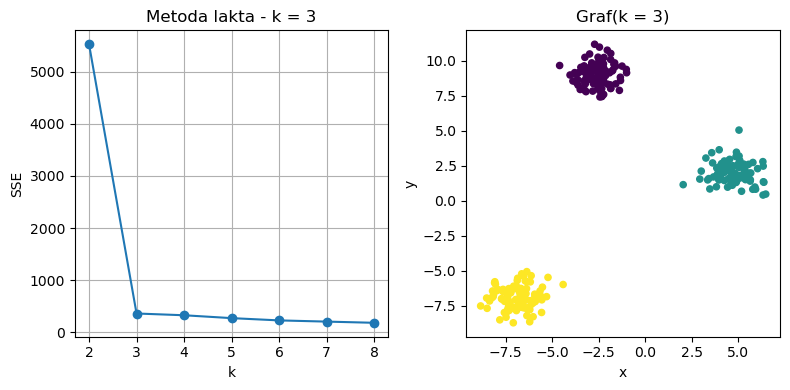

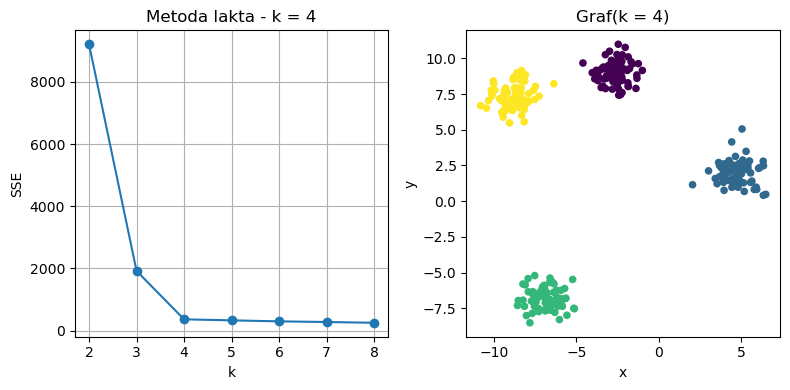

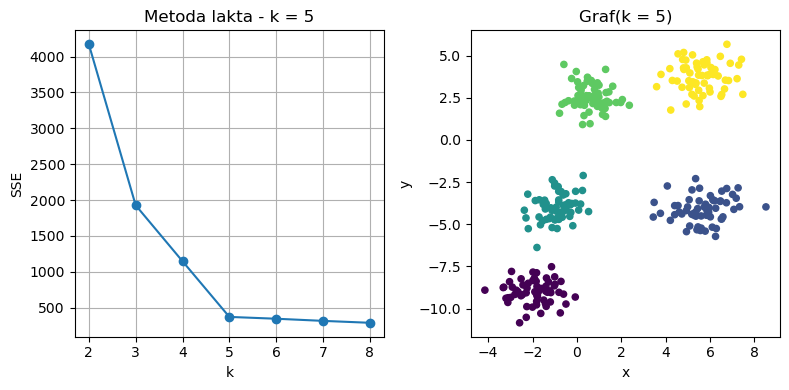

In [267]:
""" računanje metode lakta  za različite vrijednosti k """
for points, true_labels, title in datasets:
    sse_values = []
    for k in k_values:
        clusterer = KMeansCustom(data=points, n_clusters=k)
        _, _ = clusterer.pipeline()
        sse_values.append(clusterer.sse())

    """ vizalizacija rezultata """
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].plot(k_values, sse_values, marker='o')
    axs[0].set_xticks(k_values)
    axs[0].set_xlabel('k')
    axs[0].set_ylabel('SSE')
    axs[0].set_title(f'Metoda lakta - {title}')
    axs[0].grid(True)

    scatter = axs[1].scatter(points[:, 0], points[:, 1],
                             c=true_labels, cmap='viridis', s=20)
    axs[1].set_title(f'Graf({title})')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')

    plt.tight_layout()
    plt.show()

Slika 2.4 Vrijednosti siluete za skup podataka

Prosječna vrijednost siluete:  0.7734206712655218


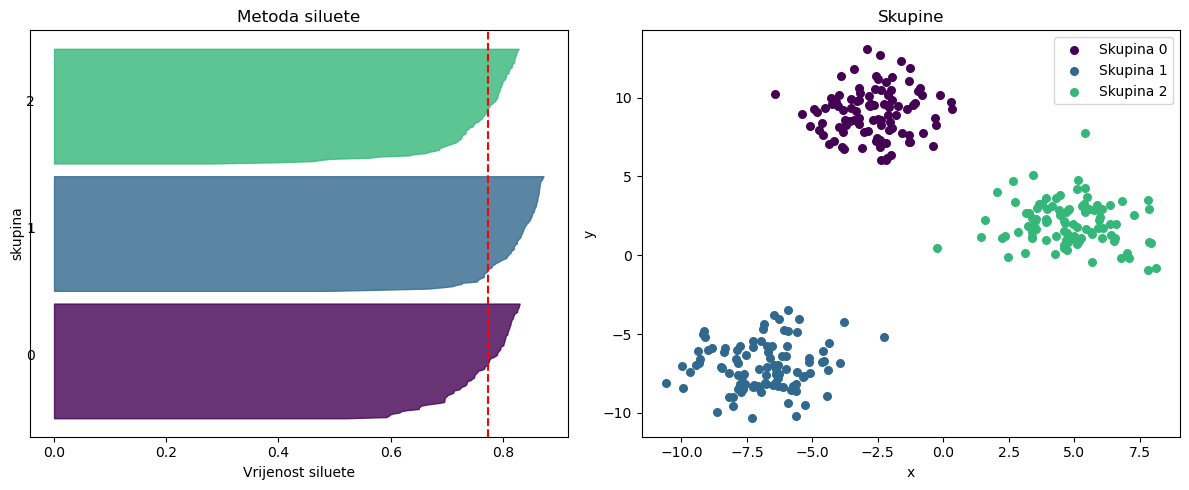

In [268]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X, _ = make_blobs(n_samples=300, centers=3,
                       cluster_std=1.5, random_state=42)

""" algoritam k-sredina """
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

""" računanje prosječne vrijednosti siluete """
sil_vals = silhouette_samples(X, labels)
avg_score = silhouette_score(X, labels)
print('Prosječna vrijednost siluete: ', avg_score)

""" vizalizacija rezultata """
cmap = plt.cm.viridis
colors = [cmap(i / k) for i in range(k)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
y_lower = 10
for i in range(k):
    ith_cluster_vals = sil_vals[labels == i]
    ith_cluster_vals.sort()
    size = ith_cluster_vals.shape[0]
    y_upper = y_lower + size

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_vals,
                      facecolor=colors[i], edgecolor=colors[i], alpha=0.8)
    ax1.text(-0.05, y_lower + 0.5 * size, str(i))
    y_lower = y_upper + 10

ax1.axvline(avg_score, color="red", linestyle="--")
ax1.set_title("Metoda siluete")
ax1.set_xlabel("Vrijenost siluete")
ax1.set_ylabel("skupina")
ax1.set_yticks([])

for i in range(k):
    ax2.scatter(X[labels == i, 0], X[labels == i, 1], s=30,
                color=colors[i], label=f'Skupina {i}')
ax2.set_title("Skupine")
ax2.legend()
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.tight_layout()
plt.show()

Slika 2.5 Metoda siluete primijenjena na više skupova podataka

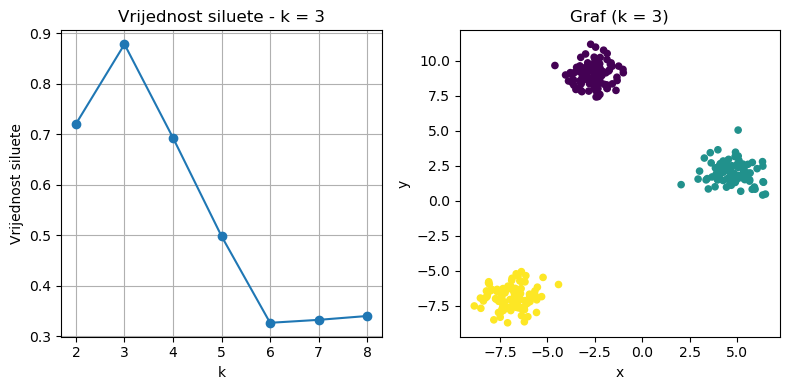

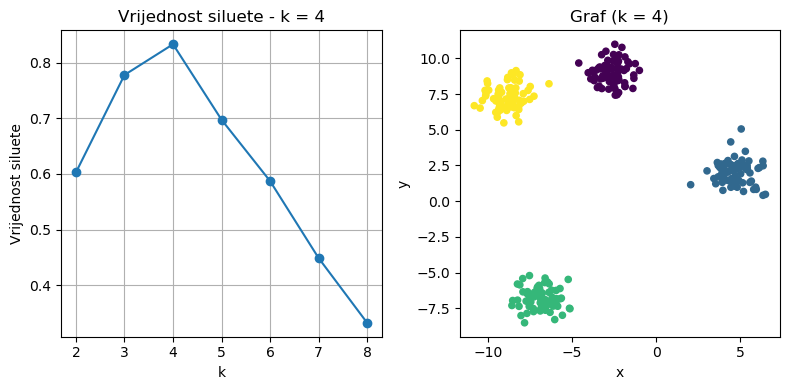

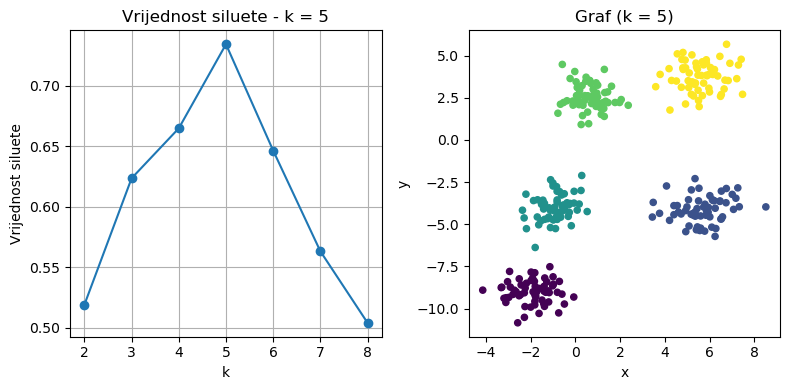

In [269]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

""" računanje vrijednosti siluete za različite vrijednosti k """
for points, true_labels, title in datasets:
    silhouette_scores = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(points)
        if k > 1:
            score = silhouette_score(points, cluster_labels)
        else:
            score = float('nan')
        silhouette_scores.append(score)

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    """ vizalizacija rezultata """
    axs[0].plot(k_values, silhouette_scores, marker='o')
    axs[0].set_xticks(k_values)
    axs[0].set_xlabel('k')
    axs[0].set_ylabel('Vrijednost siluete')
    axs[0].set_title(f'Vrijednost siluete - {title}')
    axs[0].grid(True)

    scatter = axs[1].scatter(points[:, 0], points[:, 1],
                             c=true_labels, cmap='viridis', s=20)
    axs[1].set_title(f'Graf ({title})')
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("y")

    plt.tight_layout()
    plt.show()

## 4. Metode spektralnog grupiranja


In [270]:
# skup podataka s 10 točaka 
data_10_points_2 = np.array([[1, 1], [2, 1], [1, 2], [2, 2], [1.5, 1.5], [3, 1], [4, 1], [3, 2], [4, 2], [3.5, 1.5]])

Slika 4.1 Početni graf


Matrica sličnosti:


Matrix([
[ 0.0, 0.14, 0.14, 0.02, 0.37,  0.0,  0.0,  0.0,  0.0,  0.0],
[0.14,  0.0, 0.02, 0.14, 0.37, 0.14,  0.0, 0.02,  0.0, 0.01],
[0.14, 0.02,  0.0, 0.14, 0.37,  0.0,  0.0,  0.0,  0.0,  0.0],
[0.02, 0.14, 0.14,  0.0, 0.37, 0.02,  0.0, 0.14,  0.0, 0.01],
[0.37, 0.37, 0.37, 0.37,  0.0, 0.01,  0.0, 0.01,  0.0,  0.0],
[ 0.0, 0.14,  0.0, 0.02, 0.01,  0.0, 0.14, 0.14, 0.02, 0.37],
[ 0.0,  0.0,  0.0,  0.0,  0.0, 0.14,  0.0, 0.02, 0.14, 0.37],
[ 0.0, 0.02,  0.0, 0.14, 0.01, 0.14, 0.02,  0.0, 0.14, 0.37],
[ 0.0,  0.0,  0.0,  0.0,  0.0, 0.02, 0.14, 0.14,  0.0, 0.37],
[ 0.0, 0.01,  0.0, 0.01,  0.0, 0.37, 0.37, 0.37, 0.37,  0.0]])

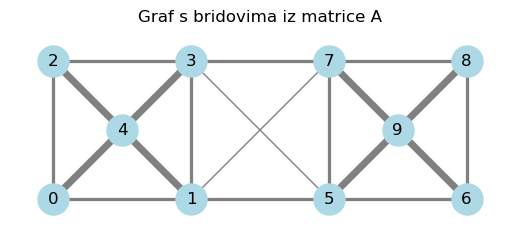

In [271]:
import matplotlib.colors as mcolors

""" model grupiranja """
sc_10_2 = SpectralClustering(data_10_points_2)

""" matrica sličnosti prema Gaussovoj jezgrenoj funkciji """
# TODO
n = len(data_10_points_2)
distances = squareform(pdist(data_10_points_2))
sigma = 0.5
A = np.exp(-distances**2 / (2 * sigma**2))
np.fill_diagonal(A, 0)
print('Matrica sličnosti:')
display(Matrix(np.round(A, 2)))

""" graf prema matrici sličnosti A """
# TODO 
G = nx.Graph()
for i in range(n):
    G.add_node(i, pos=data_10_points_2[i])
for i in range(n):
    for j in range(i + 1, n):
        if A[i, j] > 0.01:
            G.add_edge(i, j, weight=A[i, j])
            

""" vizalizacija težina bridova na početnome grafu """
# TODO
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
min_width, max_width = 1, 5
min_w, max_w = min(weights), max(weights)
edge_widths = [min_width + (w - min_w) / (max_w - min_w)
               * (max_width - min_width) for w in weights]
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(5, 2))
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        edge_color='gray', width=edge_widths, node_size=500)
plt.title("Graf s bridovima iz matrice A")
plt.axis('equal')
plt.show()

Slika 4.1 Početni graf

Slika 4.2 Prikaz grupiranja podataka Fiedlerovim vektorom i pripadni primjer

Laplaceova matrica:


Matrix([
[ 0.66, -0.14, -0.14, -0.02, -0.37,   0.0,   0.0,   0.0,   0.0,   0.0],
[-0.14,  0.82, -0.02, -0.14, -0.37, -0.14,   0.0, -0.02,   0.0, -0.01],
[-0.14, -0.02,  0.66, -0.14, -0.37,   0.0,   0.0,   0.0,   0.0,   0.0],
[-0.02, -0.14, -0.14,  0.82, -0.37, -0.02,   0.0, -0.14,   0.0, -0.01],
[-0.37, -0.37, -0.37, -0.37,  1.49, -0.01,   0.0, -0.01,   0.0,   0.0],
[  0.0, -0.14,   0.0, -0.02, -0.01,  0.82, -0.14, -0.14, -0.02, -0.37],
[  0.0,   0.0,   0.0,   0.0,   0.0, -0.14,  0.66, -0.02, -0.14, -0.37],
[  0.0, -0.02,   0.0, -0.14, -0.01, -0.14, -0.02,  0.82, -0.14, -0.37],
[  0.0,   0.0,   0.0,   0.0,   0.0, -0.02, -0.14, -0.14,  0.66, -0.37],
[  0.0, -0.01,   0.0, -0.01,   0.0, -0.37, -0.37, -0.37, -0.37,  1.49]])

Svojstvene vrijednosti:



Matrix([
[ 0.0],
[0.11],
[0.68],
[0.69],
[0.75],
[0.86],
[0.93],
[1.11],
[1.86],
[1.88]])

Svojstveni vektori:



Matrix([
[-0.32, -0.37, -0.35, -0.38, -0.47,  -0.3, -0.32, -0.17,  0.16,  0.15],
[-0.32, -0.24,  0.35, -0.32, -0.17,  0.39,  0.38,  0.47,  0.16,  0.19],
[-0.32, -0.37, -0.35,  0.38,  0.47,  -0.3,  0.32,  0.17,  0.16,  0.15],
[-0.32, -0.24,  0.35,  0.32,  0.17,  0.39, -0.38, -0.47,  0.16,  0.19],
[-0.32, -0.32,   0.0,   0.0,   0.0,  0.11,   0.0,   0.0, -0.63, -0.62],
[-0.32,  0.24,  0.35, -0.32,  0.17, -0.39,  0.38, -0.47,  0.16, -0.19],
[-0.32,  0.37, -0.35, -0.38,  0.47,   0.3, -0.32,  0.17,  0.16, -0.15],
[-0.32,  0.24,  0.35,  0.32, -0.17, -0.39, -0.38,  0.47,  0.16, -0.19],
[-0.32,  0.37, -0.35,  0.38, -0.47,   0.3,  0.32, -0.17,  0.16, -0.15],
[-0.32,  0.32,   0.0,   0.0,   0.0, -0.11,   0.0,   0.0, -0.63,  0.62]])

Fiedlerov vektor:



Matrix([
[-0.37],
[-0.24],
[-0.37],
[-0.24],
[-0.32],
[ 0.24],
[ 0.37],
[ 0.24],
[ 0.37],
[ 0.32]])

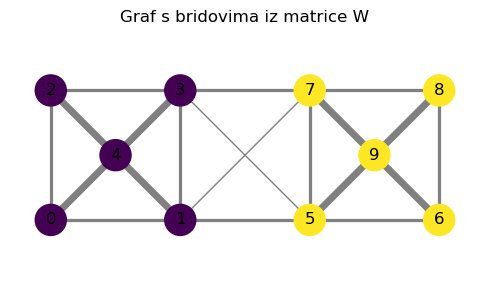

In [272]:
""" Laplaceova matrica """
L = sc_10_2.compute_laplacian(A)
print('Laplaceova matrica:')
display(Matrix(np.round(L, 2)))

""" svojstvene vrijednosti i svojstveni vektori """
fiedler_vector, clusters = sc_10_2.compute_fiedler_vector(use_normalized=False)
print('Svojstvene vrijednosti:\n')
display(Matrix(np.round(sc_10_2.eigvals, 2)))
print('Svojstveni vektori:\n')
display(Matrix(np.round(sc_10_2.eigvecs, 2)))
print('Fiedlerov vektor:\n')
display(Matrix(np.round(fiedler_vector, 2)))

""" vizualizacija grupiranog grafa i svojstvenih vrijednosti """
# boje
cmap = plt.get_cmap('viridis')
n_clusters = len(set(clusters))
norm = mcolors.Normalize(vmin=0, vmax=n_clusters - 1)
node_colors = [cmap(norm(clusters[i])) for i in range(len(clusters))]

fig, ax = plt.subplots(figsize=(5, 3))
nx.draw(G, pos, ax=ax, with_labels=True, node_color=node_colors,
        edge_color='gray', width=edge_widths, node_size=500)
ax.set_title("Graf s bridovima iz matrice W")
ax.axis('equal')

plt.tight_layout()
plt.show()


Slika 4.3 Prikaz grupiranih podataka korištenjem metode normaliziranog reza i pripadni primjer

Za primjere metode normaliziranog reza koristi se SpectralClusteringSM klasa.

Fiedlerov vektor:



Matrix([
[ 0.31],
[ 0.23],
[ 0.31],
[ 0.23],
[ 0.44],
[-0.23],
[-0.31],
[-0.23],
[-0.31],
[-0.44]])

Vrijednosti normaliziranog reza za Fiedlerov vektor:



Matrix([
[ 1.2],
[0.87],
[0.55],
[0.39],
[0.15],
[0.39],
[0.55],
[0.87],
[ 1.2]])

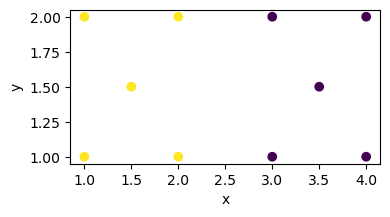

In [273]:
# metoda normaliziranog reza
model_sm = SpectralClusteringSM(sigma_X=0.5,ncut_max=0.2)
clusters = model_sm.segment_2d(data_10_points_2)

""" Fiedlerov vektor """
print('Fiedlerov vektor:\n')
display(Matrix(np.round(model_sm.fiedler_vectors[0], 2)))

""" Vrijednosti normaliziranog reza """
print('Vrijednosti normaliziranog reza za Fiedlerov vektor:\n')
display(Matrix(np.round(model_sm.all_ncut_values[0], 2)))

""" vizualizacija grupiranih podataka """
plt.figure(figsize=(4, 2))
plt.scatter(data_10_points_2[:, 0], data_10_points_2[:, 1], c=clusters)
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')
plt.show()

Slika 4.4 Prikaz grupiranih podataka korištenjem metode Cheegerove provodljivosti i pripadni primjer

Fiedlerov vektor:



Matrix([
[ 0.31],
[ 0.23],
[ 0.31],
[ 0.23],
[ 0.44],
[-0.23],
[-0.31],
[-0.23],
[-0.31],
[-0.44]])

Vrijednosti reza za Fiedlerov vektor:



Matrix([
[  1.0],
[0.657],
[0.378],
[ 0.23],
[0.076],
[ 0.23],
[0.378],
[0.657],
[  1.0]])

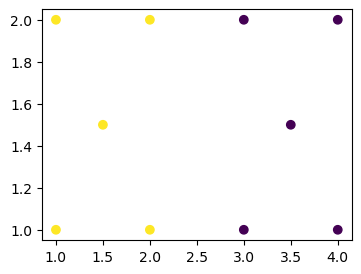

In [274]:
model_kvv = SpectralClusteringKVV(
    sigma_X=0.5,
    cheeger_cond_max=0.3,
    adjustion="kvv_mult"
)
clusters = model_kvv.segment_2d(data_10_points_2)

""" Fiedlerov vektor """
print('Fiedlerov vektor:\n')
display(Matrix(np.round(model_kvv.fiedler_vectors[0], 2)))

""" Vrijednosti reza temeljene na Cheegerovoj provodljivosti """
print('Vrijednosti reza za Fiedlerov vektor:\n')
display(Matrix(np.round(model_kvv.all_cheeger_cond_values[0], 3)))



plt.figure(figsize=(4, 3))
plt.scatter(data_10_points_2[:, 0], data_10_points_2[:, 1], c=clusters)
plt.show()

## 4.2 Prikaz metoda grupiranja u više skupina

Slika 4.5 Grupiranje podataka u više skupina

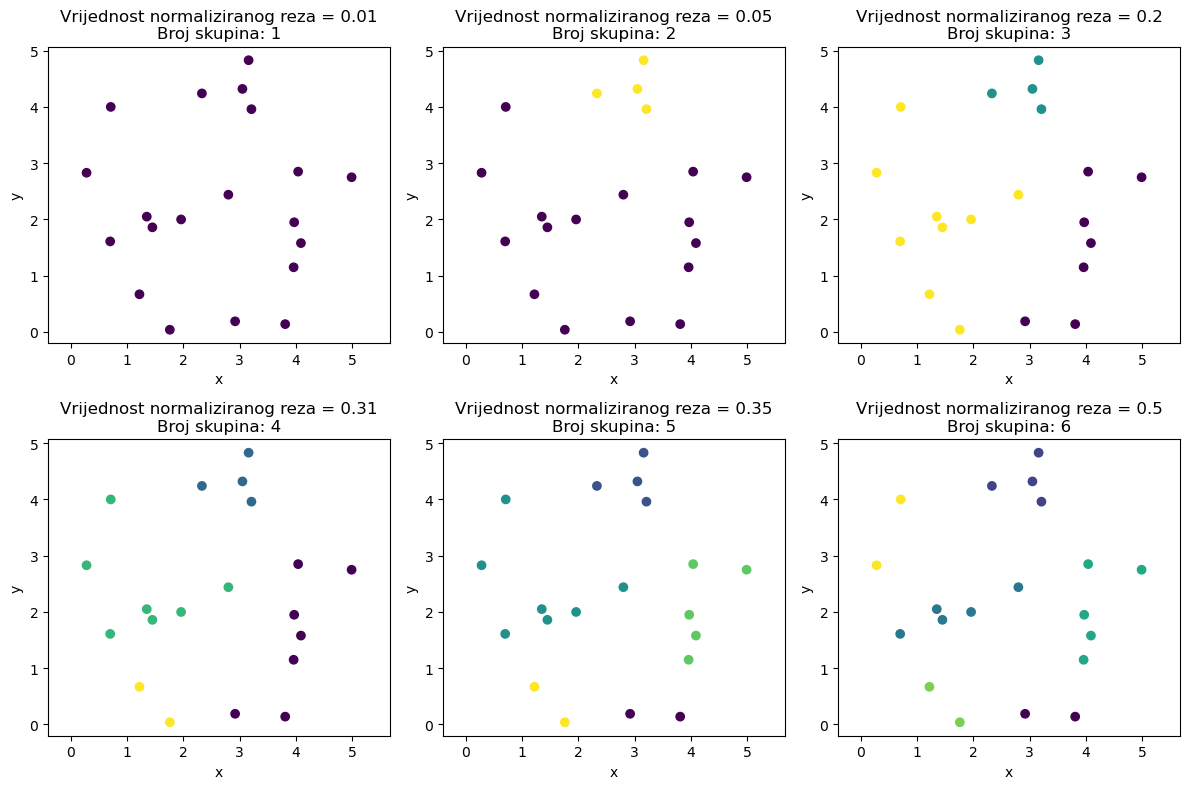

In [275]:
""" nasumično određeni podatci """
points = np.array([[3.97, 1.95], [2.33, 4.24], [2.92, 0.19], [1.45, 1.86], [4.04, 2.85], [1.96, 2.], [1.35, 2.05], [2.8,  2.44],
                   [4.99, 2.75], [3.81, 0.14], [3.96, 1.15], [1.76, 0.04], [
                       3.21, 3.96], [3.05, 4.32], [0.28, 2.83],
                   [4.09, 1.58], [0.71, 4.], [0.7,  1.61], [1.22, 0.67], [3.16, 4.83]])
ncut_values = [0.01, 0.05, 0.2, 0.31, 0.35, 0.5]

""" vizualizacija rezultata normaliziranog reza za više skupina """
n_cols = 3
n_rows = 2
plt.figure(figsize=(4 * n_cols, 4 * n_rows))

for i, ncut in enumerate(ncut_values):
    """ model grupiranja """
    model = SpectralClusteringSM(
        sigma_X=0.5,
        ncut_max=ncut
    )
    clusters = model.segment_2d(points)

    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap='viridis')
    plt.title(
        f'Vrijednost normaliziranog reza = {np.round(ncut, 2)}\nBroj skupina: {len(np.unique(clusters))}')
    plt.axis('equal')
    plt.gca().set_xlabel('x')
    plt.gca().set_ylabel('y')

plt.tight_layout()
plt.show()

Slika 4.6 Kreiranje Laplaceove podmatrice kod metode Cheegerove provodljivosti

In [276]:
"""model grupiranja"""

model = SpectralClusteringKVV(sigma_X=0.5, cheeger_cond_max=0.3, adjustion="kvv_mult")
clusters = model.segment_2d(data_10_points_2)
print("Laplaceova matrica: ")
display(Matrix(np.round(model.L, 2)))

print("Odabrani indeksi za podmatricu:")
print(model.L_subs_indices[1][1])

print("Podmatrica Laplaceove matrice:")
display(Matrix(np.round(model.L_subs_indices[1][0], 2)))

Laplaceova matrica: 


Matrix([
[  1.0, -0.18, -0.21, -0.02, -0.37,   0.0,   0.0,   0.0,   0.0,   0.0],
[-0.18,   1.0, -0.02, -0.17, -0.33, -0.17,   0.0, -0.02,   0.0, -0.01],
[-0.21, -0.02,   1.0, -0.18, -0.37,   0.0,   0.0,   0.0,   0.0,   0.0],
[-0.02, -0.17, -0.18,   1.0, -0.33, -0.02,   0.0, -0.17,   0.0, -0.01],
[-0.37, -0.33, -0.37, -0.33,   1.0, -0.01,   0.0, -0.01,   0.0,   0.0],
[  0.0, -0.17,   0.0, -0.02, -0.01,   1.0, -0.18, -0.17, -0.02, -0.33],
[  0.0,   0.0,   0.0,   0.0,   0.0, -0.18,   1.0, -0.02, -0.21, -0.37],
[  0.0, -0.02,   0.0, -0.17, -0.01, -0.17, -0.02,   1.0, -0.18, -0.33],
[  0.0,   0.0,   0.0,   0.0,   0.0, -0.02, -0.21, -0.18,   1.0, -0.37],
[  0.0, -0.01,   0.0, -0.01,   0.0, -0.33, -0.37, -0.33, -0.37,   1.0]])

Odabrani indeksi za podmatricu:
[9 8 6 7 5]
Podmatrica Laplaceove matrice:


Matrix([
[  1.0, -0.37, -0.37, -0.33, -0.33],
[-0.37,   1.0, -0.21, -0.18, -0.02],
[-0.37, -0.21,   1.0, -0.02, -0.18],
[-0.33, -0.18, -0.02,   1.0, -0.17],
[-0.33, -0.02, -0.18, -0.17,   1.0]])

Slika 4.7 Prikaz matrice Y prije i nakon grupiranja NJW metodom

Slika 4.8 Prikaz grupiranih podataka metodom NJW

Broj skupina: 2
Svojstveni vektori (u stupcima): 


Matrix([
[-0.27,  0.31,  0.34,  0.25,   0.4, -0.34,  0.43, -0.29, -0.25, -0.19],
[ -0.3,  0.23, -0.36,  0.43,  0.29,  0.36, -0.25,   0.4, -0.16, -0.25],
[-0.27,  0.31,  0.34, -0.25,  -0.4, -0.34, -0.43,  0.29, -0.25, -0.19],
[ -0.3,  0.23, -0.36, -0.43, -0.29,  0.36,  0.25,  -0.4, -0.16, -0.25],
[-0.41,  0.44,  0.09,   0.0,   0.0,   0.1,   0.0,   0.0,  0.57,  0.55],
[ -0.3, -0.23, -0.36,  0.43, -0.29, -0.36, -0.25,  -0.4, -0.16,  0.25],
[-0.27, -0.31,  0.34,  0.25,  -0.4,  0.34,  0.43,  0.29, -0.25,  0.19],
[ -0.3, -0.23, -0.36, -0.43,  0.29, -0.36,  0.25,   0.4, -0.16,  0.25],
[-0.27, -0.31,  0.34, -0.25,   0.4,  0.34, -0.43, -0.29, -0.25,  0.19],
[-0.41, -0.44,  0.09,   0.0,   0.0,  -0.1,   0.0,   0.0,  0.57, -0.55]])

X matrica:


Matrix([
[-0.27,  0.31],
[ -0.3,  0.23],
[-0.27,  0.31],
[ -0.3,  0.23],
[-0.41,  0.44],
[ -0.3, -0.23],
[-0.27, -0.31],
[ -0.3, -0.23],
[-0.27, -0.31],
[-0.41, -0.44]])

Y matrica:


Matrix([
[-0.65,  0.76],
[-0.79,  0.61],
[-0.65,  0.76],
[-0.79,  0.61],
[-0.68,  0.73],
[-0.79, -0.61],
[-0.65, -0.76],
[-0.79, -0.61],
[-0.65, -0.76],
[-0.68, -0.73]])

Vizualizacija međurezultata matrica X i Y i grupiranih rezultata:


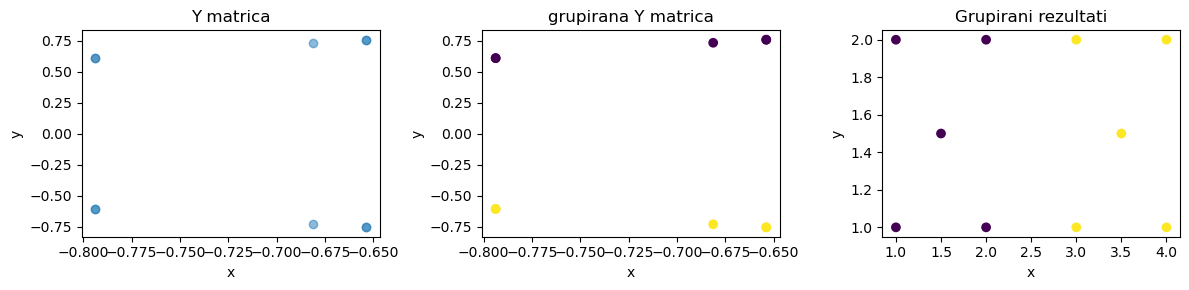

In [277]:
""" model grupiranja """
sc = SpectralClusteringNJW(sigma_X=0.5, max_clusters=2)
clusters_sc = sc.segment_2d(data_10_points_2)

print('Broj skupina:', sc.max_clusters)
print('Svojstveni vektori (u stupcima): ')
display(Matrix(np.round(sc.eigvecs, 2)))
print('X matrica:')
display(Matrix(np.round(sc.X, 2)))
print('Y matrica:')
display(Matrix(np.round(sc.Y, 2)))

""" Vizaulizacije """
print('Vizualizacija međurezultata matrica X i Y i grupiranih rezultata:')
fig, axs = plt.subplots(1, 3, figsize=(12, 3)) 
# X matrica
axs[0].scatter(sc.Y[:, 0], sc.Y[:, 1], alpha=0.5)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Y matrica')

# Y matrica
axs[1].scatter(sc.Y[:, 0], sc.Y[:, 1], c=clusters_sc)
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('grupirana Y matrica')

# Grupirani rezultati
axs[2].scatter(data_10_points_2[:, 0], data_10_points_2[:, 1], c=clusters_sc)
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Grupirani rezultati')

plt.tight_layout()
plt.show()


Slika 4.9 Vizualizacija matrice Y


Broj skupina: 3
Svojstveni vektori (u stupcima): 


Matrix([
[ -0.5,  0.42, -0.76],
[-0.41, -0.44,  -0.8],
[-0.68, -0.73,  0.11],
[ -0.7,  -0.6, -0.38],
[-0.64, -0.66,  0.41],
[-0.65,  0.72,  0.25],
[-0.54, -0.46,  0.71],
[ -0.6,  0.63,  0.49],
[-0.53,  0.65, -0.54],
[-0.64,  0.59,  0.49]])

X matrica:


Matrix([
[ -0.5,  0.42, -0.76],
[-0.41, -0.44,  -0.8],
[-0.68, -0.73,  0.11],
[ -0.7,  -0.6, -0.38],
[-0.64, -0.66,  0.41],
[-0.65,  0.72,  0.25],
[-0.54, -0.46,  0.71],
[ -0.6,  0.63,  0.49],
[-0.53,  0.65, -0.54],
[-0.64,  0.59,  0.49]])

Y matrica:


Matrix([
[ -0.5,  0.42, -0.76],
[-0.41, -0.44,  -0.8],
[-0.68, -0.73,  0.11],
[ -0.7,  -0.6, -0.38],
[-0.64, -0.66,  0.41],
[-0.65,  0.72,  0.25],
[-0.54, -0.46,  0.71],
[ -0.6,  0.63,  0.49],
[-0.53,  0.65, -0.54],
[-0.64,  0.59,  0.49]])

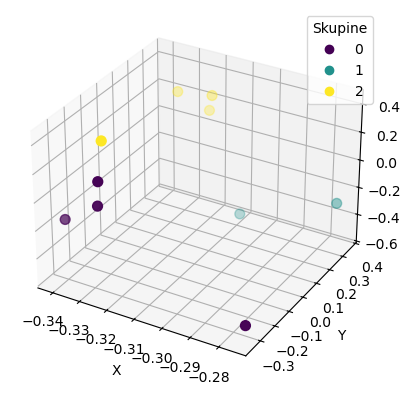

In [278]:
from sklearn.datasets import make_blobs
# njw
import NJWAlgorithm
importlib.reload(NJWAlgorithm)
SpectralClusteringNJW = NJWAlgorithm.SpectralClusteringNJW

""" generiranje 3D podataka """
data_3d, _ = make_blobs(n_samples=10, centers=[[-1, 0], [1, 0]], cluster_std=0.3)

""" model grupiranja """
sc_kvv_3d = SpectralClusteringNJW(sigma_X=1, max_clusters=3)
sc_kvv_3d.segment_3d(data_3d)

print('Broj skupina:', sc_kvv_3d.max_clusters)
print('Svojstveni vektori (u stupcima): ')
display(Matrix(np.round(sc_kvv_3d.Y, 2)))
print('X matrica:')
display(Matrix(np.round(sc_kvv_3d.Y, 2)))
print('Y matrica:')
display(Matrix(np.round(sc_kvv_3d.Y, 2)))

""" vizualizacija 3D matrice """
sc_kvv_3d.visualize_3d_clusters()

Slika 4.10 Grupiranje podataka u 3 skupine metodom NJW

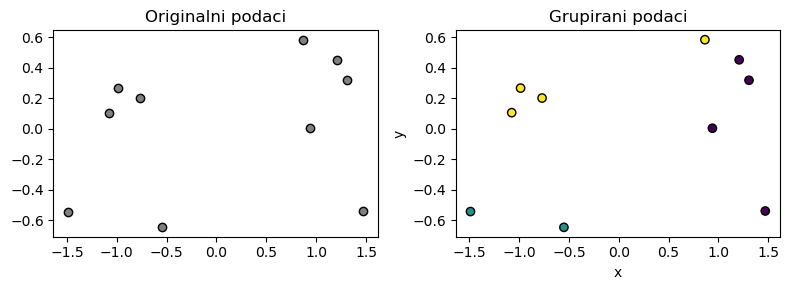

In [279]:
""" vizualizacija početnih i grupiranih rezultata """
fig, axs = plt.subplots(1, 2, figsize=(8, 3))  
# Lijevi graf
axs[0].scatter(data_3d[:, 0], data_3d[:, 1], c='gray', edgecolor='k')
axs[0].set_title('Originalni podaci')
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')
# Desni graf
axs[1].scatter(data_3d[:, 0], data_3d[:, 1], c=sc_kvv_3d.clusters, cmap='viridis', edgecolor='k')
axs[1].set_title('Grupirani podaci')
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')

plt.tight_layout()
plt.show()

Slika 4.11 Usporedba grupiranja koncentričnih krugova NJW metodom i algoritmom k-sredina

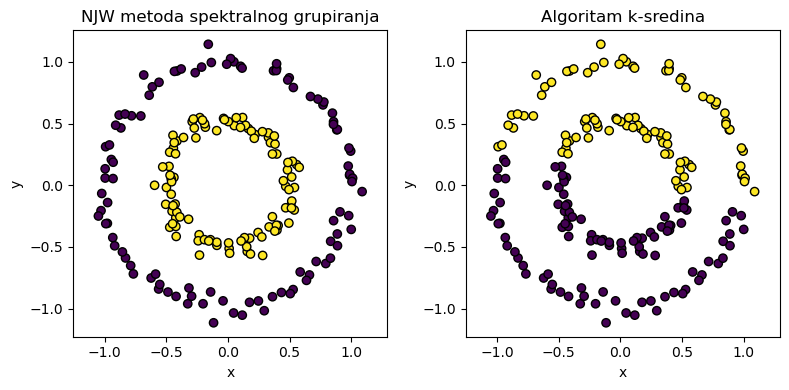

In [280]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

""" podatci: koncentrični krugovi """
X, _ = make_circles(n_samples=200, factor=0.5, noise=0.05)

""" model spektralnog grupiranja """
sc = SpectralClusteringNJW(sigma_X=0.1, max_clusters=2)
clusters_sc = sc.segment_2d(X)

""" model algoritma k-sredina """
kmeans = KMeansCustom(n_clusters=2, data=X)
clusters_kmeans, _ = kmeans.pipeline()

""" vizualizacija rezultata """
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# NJW graf
axs[0].scatter(X[:, 0], X[:, 1], c=clusters_sc, cmap='viridis', edgecolors='k')
axs[0].set_title('NJW metoda spektralnog grupiranja')
axs[0].axis('equal')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
# Algoritam k-sredina graf

axs[1].scatter(X[:, 0], X[:, 1], c=clusters_kmeans,
               cmap='viridis', edgecolors='k')
axs[1].set_title('Algoritam k-sredina')
axs[1].axis('equal')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

plt.tight_layout()
plt.show()

Slika 4.12 Prikaz svojstvenih vrijednosti Laplaceove matrice

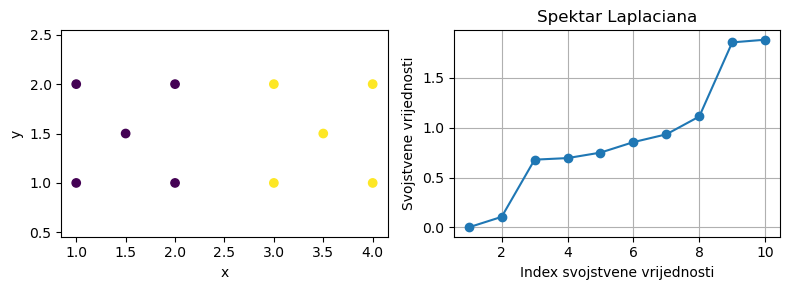

In [281]:
""" model grupiranja """
sc_10_2 = SpectralClustering(data_10_points_2)
sc_10_2.compute_laplacian(A)
fiedler_vector, clusters = sc_10_2.compute_fiedler_vector(use_normalized=False)

""" vizualizacija rezultata """
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

axs[0].scatter(data_10_points_2[:, 0], data_10_points_2[:, 1], c=clusters, cmap='viridis')
axs[0].axis('equal')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

axs[1].plot(np.arange(1, len(sc_10_2.eigvals)+1), sc_10_2.eigvals, 'o-')
axs[1].set_title('Spektar Laplaciana')
axs[1].set_xlabel('Index svojstvene vrijednosti')
axs[1].set_ylabel('Svojstvene vrijednosti')
axs[1].grid(True)

plt.tight_layout()
plt.show()


## Rezultati i usporedba metoda

U sljedećim primjerima korsiti se IRIS skup podataka

In [282]:
""" ujednačavanje boja za vizualizaciju """
custom_cmap = ListedColormap(['#440150', '#FDE725'])
custom_cmap_reverse = ListedColormap(['#FDE725', '#440150'])
group_custom_cmap = [custom_cmap_reverse, custom_cmap, custom_cmap,
                     custom_cmap_reverse, custom_cmap_reverse, custom_cmap]

""" podatci iz IRIS skupa podataka """
iris = load_iris()
x_iris = iris.data[:, :2] 
sigma_x_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

### 5.1. Primjeri s grafovima

Slika 5.1 Utjecaj parametra σ_x  na rezultate grupiranja podataka

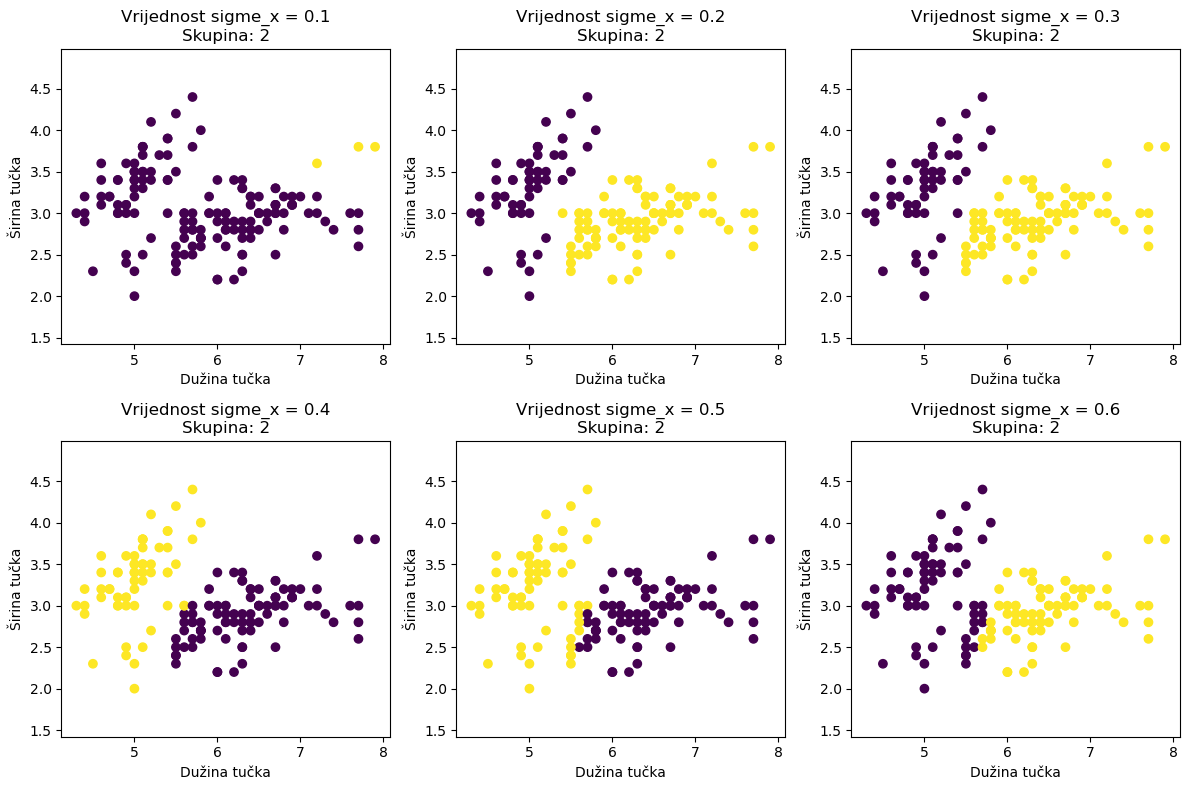

In [283]:

""" vizualizacija rezultata """
n_cols = 3
n_rows = 2
plt.figure(figsize=(4 * n_cols, 4 * n_rows))

current_num_of_clusters = 0
for i, sigma_x in enumerate(sigma_x_values):
    """ model spektralnog grupiranja """
    sc_sigma_x = SpectralClustering(x_iris)
    sc_sigma_x.pipeline(sigma=sigma_x)    
    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(x_iris[:, 0], x_iris[:, 1], c=sc_sigma_x.clusters, cmap=group_custom_cmap[i])
    plt.title(
        f'Vrijednost sigme_x = {np.round(sigma_x, 2)}\nSkupina: {len(np.unique(clusters))}')
    plt.xlabel('Dužina tučka')
    plt.ylabel('Širina tučka')
    plt.axis('equal')

plt.tight_layout()
plt.show()

Slika 5.2 Utjecaj normalizacije Laplaceove matrice na rezultate grupiranja podataka

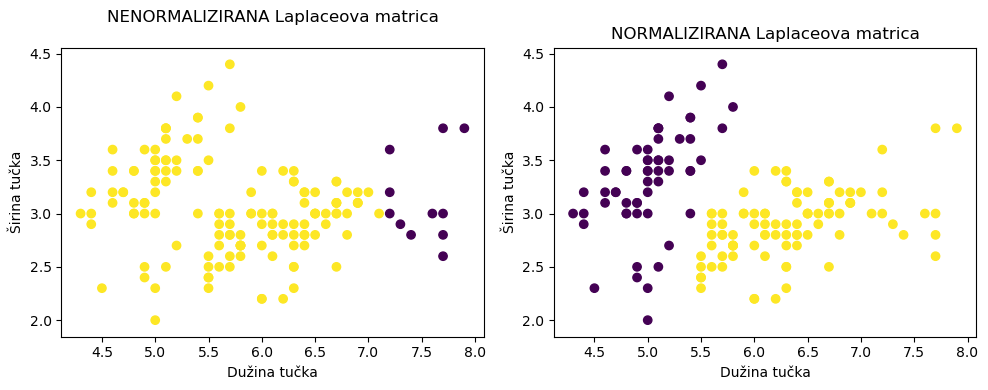

In [284]:
""" vizualizacija rezultata normalizirane i nenormalizirane Laplaceove matrice """
plt.figure(figsize=(10, 4))
# Nenormalizirana Laplaceova matrica
sc_sigma_x_nenorm = SpectralClustering(x_iris)
sc_sigma_x_nenorm.pipeline(sigma=0.3, normalized=False)    
plt.subplot(1, 2, 1)
plt.scatter(x_iris[:, 0], x_iris[:, 1], c=sc_sigma_x_nenorm.clusters, cmap='viridis')
plt.title(f'NENORMALIZIRANA Laplaceova matrica\n')
plt.xlabel('Dužina tučka')
plt.ylabel('Širina tučka')
plt.axis('equal')

# Normalizirana Laplaceova matrica
sc_sigma_x_norm = SpectralClustering(x_iris)
sc_sigma_x_norm.pipeline(sigma=0.3)    
plt.subplot(1, 2, 2)
plt.scatter(x_iris[:, 0], x_iris[:, 1], c=sc_sigma_x_norm.clusters, cmap='viridis')
plt.title(f'NORMALIZIRANA Laplaceova matrica')
plt.xlabel('Dužina tučka')
plt.ylabel('Širina tučka')
plt.axis('equal')

plt.tight_layout()
plt.show()

Slika 5.3 Usporedba spektralnog grupiranja i algoritma k-sredina na raznim oblicima podataka iz Python biblioteke sklearn.datasets

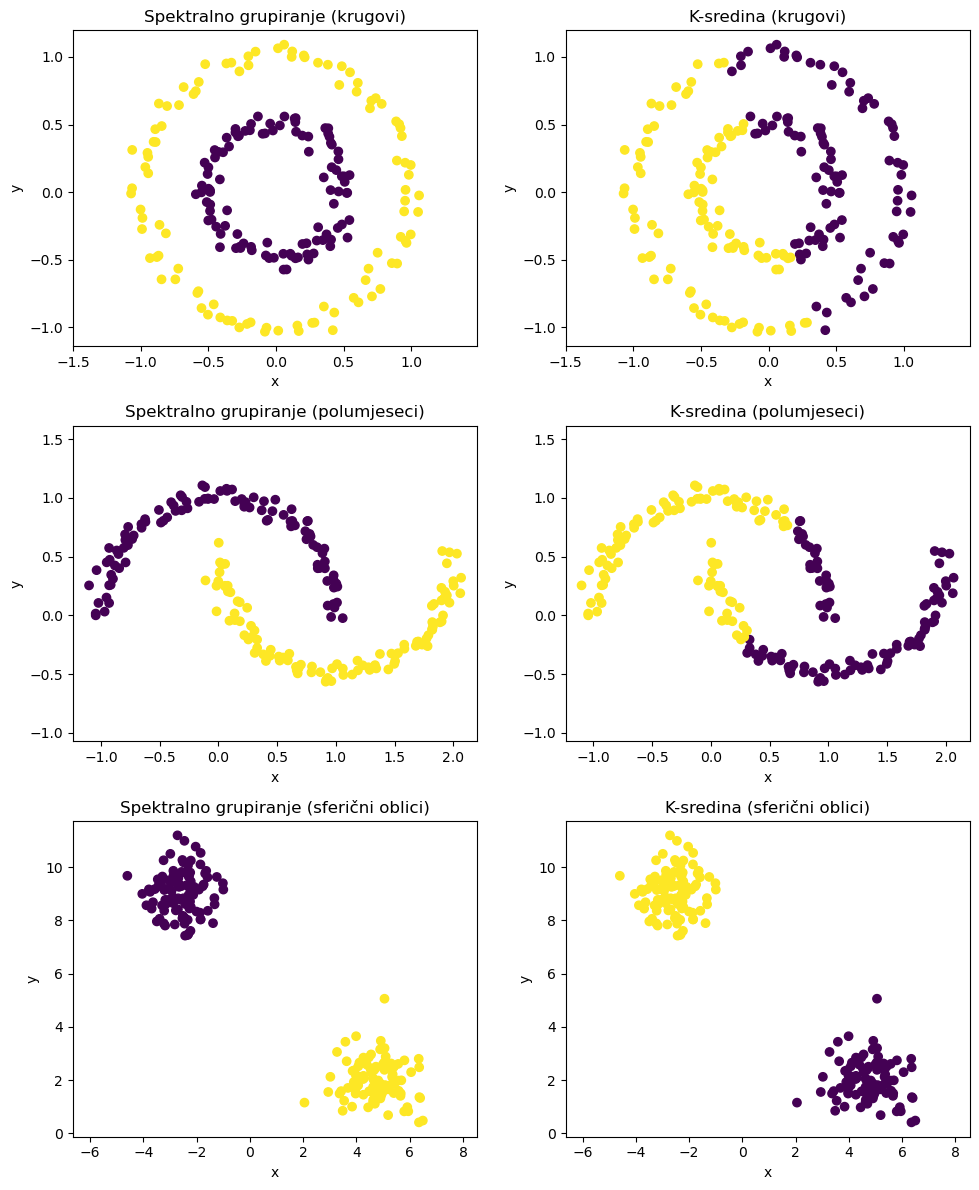

In [285]:
""" prva usporedba: koncentrični krugovi """
X1, _ = make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=42)
# spektralno grupiranje
sc_1 = SpectralClustering(X1)
sc_1.pipeline(sigma=0.1)  
# algoritam k-sredina  
clusterer1 = KMeansCustom(data=X1, n_clusters=2)
labels1, _ = clusterer1.pipeline()

""" druga usporedba: polumjeseci """
X2, _ = make_moons(n_samples=200, noise=0.05, random_state=42)
# spektralno grupiranje
sc_2 = SpectralClustering(X2)
sc_2.pipeline(sigma=0.1)  
# algoritam k-sredina  
clusterer2 = KMeansCustom(data=X2, n_clusters=2)
labels2, _ = clusterer2.pipeline()

""" treća usporedba: sferični oblici """
X3, _ = make_blobs(n_samples=200, centers=2, cluster_std=0.80, random_state=42)
# spektralno grupiranje
sc_3 = SpectralClustering(X3)
sc_3.pipeline(sigma=1)  
# algoritam k-sredina  
clusterer3 = KMeansCustom(data=X3, n_clusters=2)
labels3, _ = clusterer3.pipeline()

""" vizualizacije rezultata """
plt.figure(figsize=(10, 12))

plt.subplot(3, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=sc_1.clusters, cmap='viridis')
plt.title("Spektralno grupiranje (krugovi)")
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(3, 2, 2)
plt.scatter(X1[:, 0], X1[:, 1], c=labels1, cmap='viridis')
plt.title("K-sredina (krugovi)")
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(3, 2, 3)
plt.scatter(X2[:, 0], X2[:, 1], c=sc_2.clusters, cmap='viridis')
plt.title("Spektralno grupiranje (polumjeseci)")
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(3, 2, 4)
plt.scatter(X2[:, 0], X2[:, 1], c=labels2, cmap='viridis')
plt.title("K-sredina (polumjeseci)")
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(3, 2, 5)
plt.scatter(X3[:, 0], X3[:, 1], c=sc_3.clusters, cmap='viridis')
plt.title("Spektralno grupiranje (sferični oblici)")
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(3, 2, 6)
plt.scatter(X3[:, 0], X3[:, 1], c=labels3, cmap='viridis')
plt.title("K-sredina (sferični oblici)")
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()

Slika 5.4 Utjecaj vrijednosti normaliziranog reza na grupiranje podataka

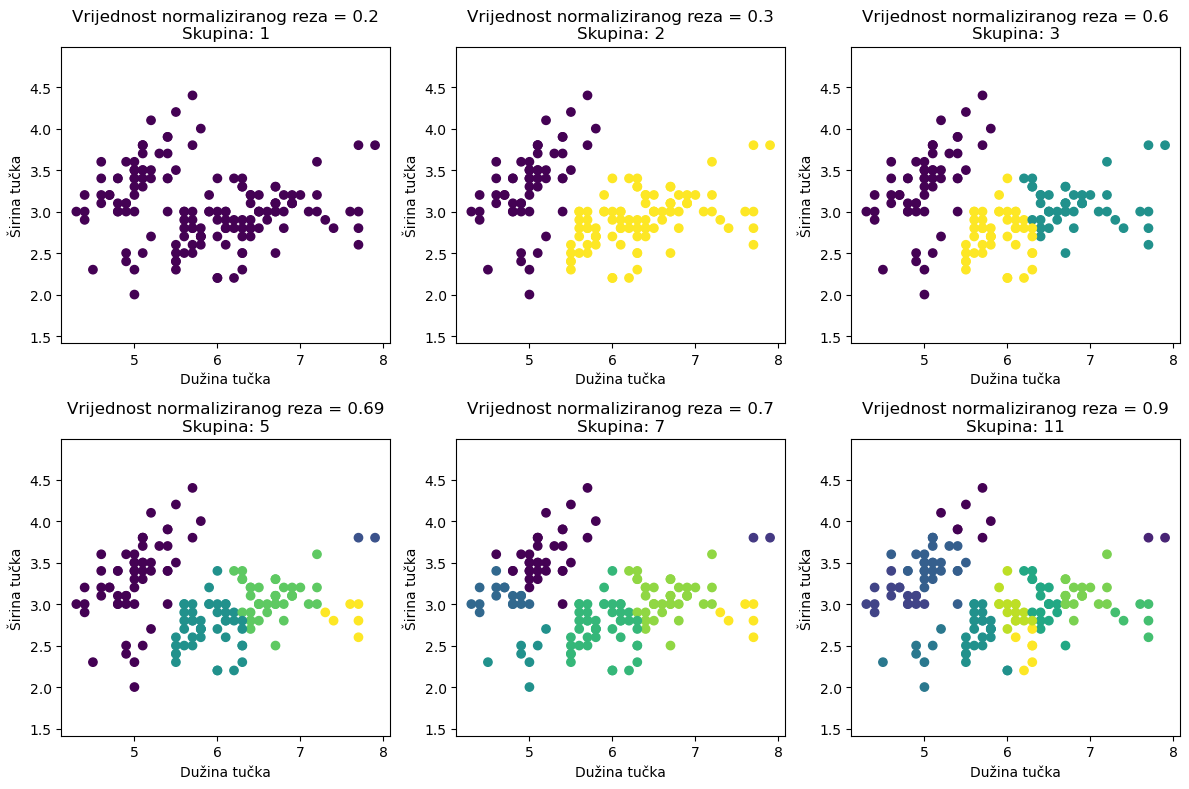

In [286]:
""" vrijednosti normaliziranog reza """
ncut_values = [0.2, 0.3, 0.6, 0.687, 0.7, 0.9]

""" vizualizacija rezultata """
n_cols = 3
n_rows = 2
plt.figure(figsize=(4 * n_cols, 4 * n_rows))

current_num_of_clusters = 0
for i, ncut in enumerate(ncut_values):
    """ model grupiranja s različitim vrijednostima normaliziranog reza """
    model_sm_2 = SpectralClusteringSM(
        sigma_X=0.5,
        ncut_max=ncut
    )
    clusters = model_sm_2.segment_2d(x_iris)

    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(x_iris[:, 0], x_iris[:, 1], c=clusters, cmap='viridis')
    plt.title(
        f'Vrijednost normaliziranog reza = {np.round(ncut, 2)}\nSkupina: {len(np.unique(clusters))}')
    plt.xlabel('Dužina tučka')
    plt.ylabel('Širina tučka')
    plt.axis('equal')

plt.tight_layout()
plt.show()

Slika 5.5 Prikaz svojstvenih vrijednosti prethodnog primjera

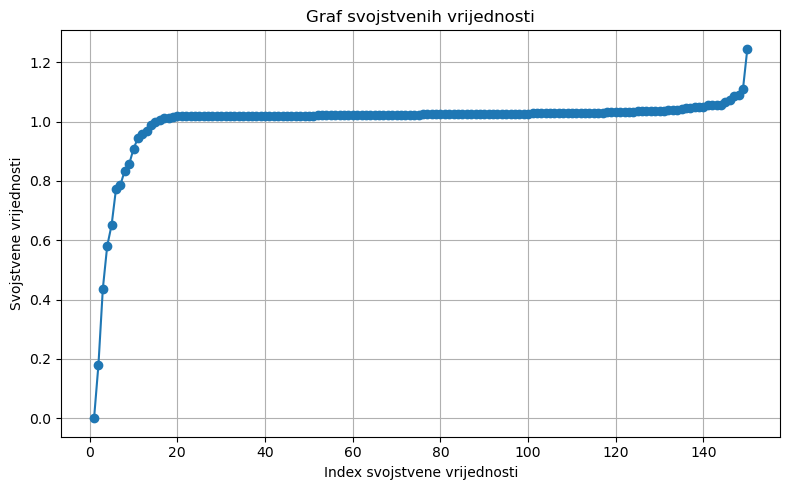

In [287]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(model_sm_2.all_eigenvals[0])+1), model_sm_2.all_eigenvals[0], 'o-')
plt.title('Graf svojstvenih vrijednosti')
plt.xlabel('Index svojstvene vrijednosti')
plt.ylabel('Svojstvene vrijednosti')
plt.grid(True)
plt.tight_layout()
plt.show()

Slika 5.6 Utjecaj broja skupina na grupiranje podataka kod NJW metode

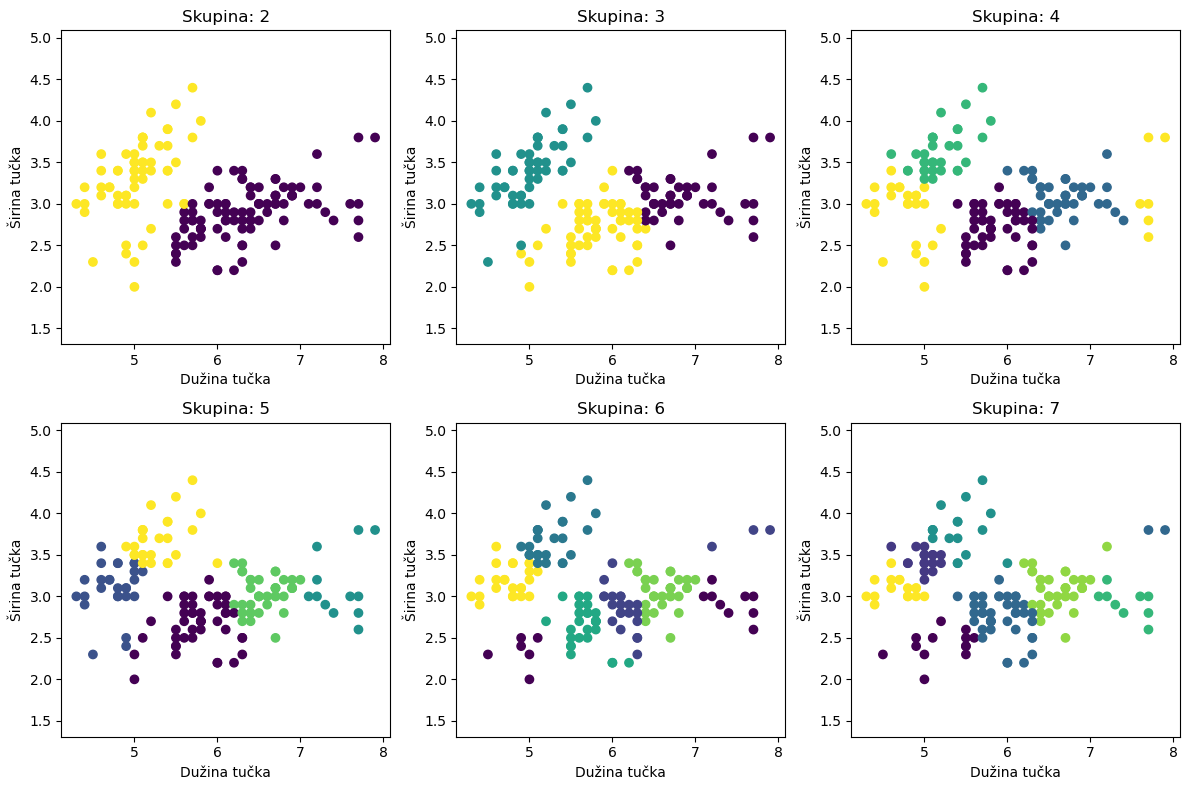

In [288]:
""" različite vrijednosti broja skupina """
max_clusters = [2, 3, 4, 5, 6, 7]

""" vizualizacija rezultata """
n_cols = 3
n_rows = 2
plt.figure(figsize=(4 * n_cols, 4 * n_rows))

current_num_of_clusters = 0
for i, clust in enumerate(max_clusters):
    """ model grupiranja s različitim brojem skupina """
    model_njw_2 = SpectralClusteringNJW(
        sigma_X=0.5,
        max_clusters=clust
    )
    clusters = model_njw_2.segment_2d(x_iris)

    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(x_iris[:, 0], x_iris[:, 1], c=clusters, cmap='viridis')
    plt.title(f'Skupina: {clust}')
    plt.xlabel('Dužina tučka')
    plt.ylabel('Širina tučka')
    plt.axis('equal')

plt.tight_layout()
plt.show()

Slika 5.7 Utjecaj granice za Cheegerovu provodljivost na grupiranje podataka za različite metode normalizacija podmatrica

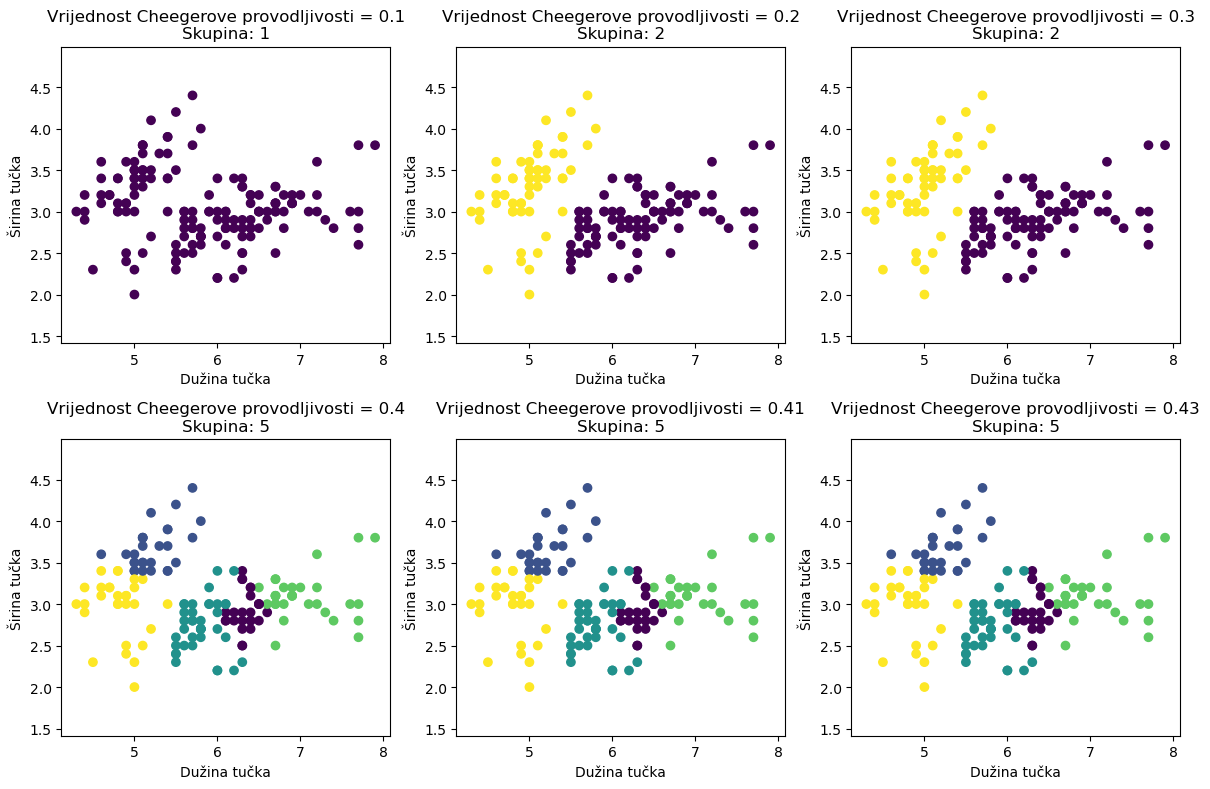

In [289]:
# uz korištenje metode normaliriranja zbrajanjem

""" različite vrijednosti Cheegerove provodljivosti """
cond_values = [0.1, 0.2, 0.3, 0.4, 0.41, 0.43]

""" vizualizacija rezultata """
n_cols = 3
n_rows = 2
plt.figure(figsize=(4 * n_cols, 4 * n_rows))

for i, cond in enumerate(cond_values):
    """ model grupiranja s različitim vrijednostima Cheegerove provodljivosti """
    model_kvv_2 = SpectralClusteringKVV(
        sigma_X=0.5,
        cheeger_cond_max=cond,
        adjustion="kvv_mult"
    )
    clusters = model_kvv_2.segment_2d(x_iris)
    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(x_iris[:, 0], x_iris[:, 1], c=clusters, cmap='viridis')
    plt.title(
        f'Vrijednost Cheegerove provodljivosti = {np.round(cond, 2)}\nSkupina: {len(np.unique(clusters))}')
    plt.axis('equal')
    plt.xlabel('Dužina tučka')
    plt.ylabel('Širina tučka')
plt.tight_layout()
plt.show()

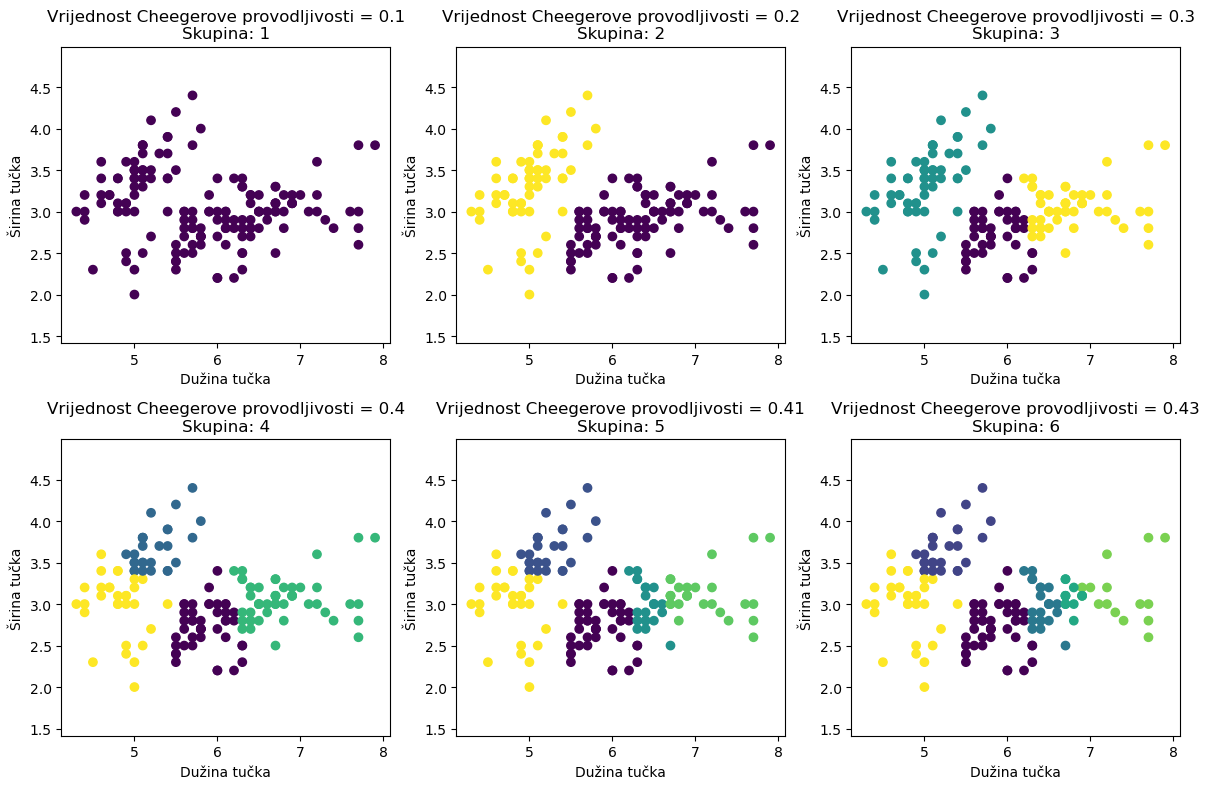

In [290]:
# uz korištenje metode normaliriranja množenjem

""" različite vrijednosti Cheegerove provodljivosti """
cond_values = [0.1, 0.2, 0.3, 0.4, 0.41, 0.43]

""" vizualizacija rezultata """
n_cols = 3
n_rows = 2
plt.figure(figsize=(4 * n_cols, 4 * n_rows))

for i, cond in enumerate(cond_values):
    """ model grupiranja s različitim vrijednostima Cheegerove provodljivosti """
    model_kvv_2 = SpectralClusteringKVV(
        sigma_X=0.5,
        cheeger_cond_max=cond,
        adjustion="kvv_add"
    )
    clusters = model_kvv_2.segment_2d(x_iris)
    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(x_iris[:, 0], x_iris[:, 1], c=clusters, cmap='viridis')
    plt.title(
        f'Vrijednost Cheegerove provodljivosti = {np.round(cond, 2)}\nSkupina: {len(np.unique(clusters))}')
    plt.axis('equal')
    plt.xlabel('Dužina tučka')
    plt.ylabel('Širina tučka')

plt.tight_layout()
plt.show()

### 5.2. Mjere sličnosti

Slika 5.8 Usporedba rezultata tri spektralna algoritma grupiranja podataka u dvije i tri skupine

ARI:
NJW vs KVV: 0.9469
NJW vs SM : 0.9469
KVV vs SM : 1.0000

NMI:
NJW vs KVV: 0.9081
NJW vs SM : 0.9081
KVV vs SM : 1.0000


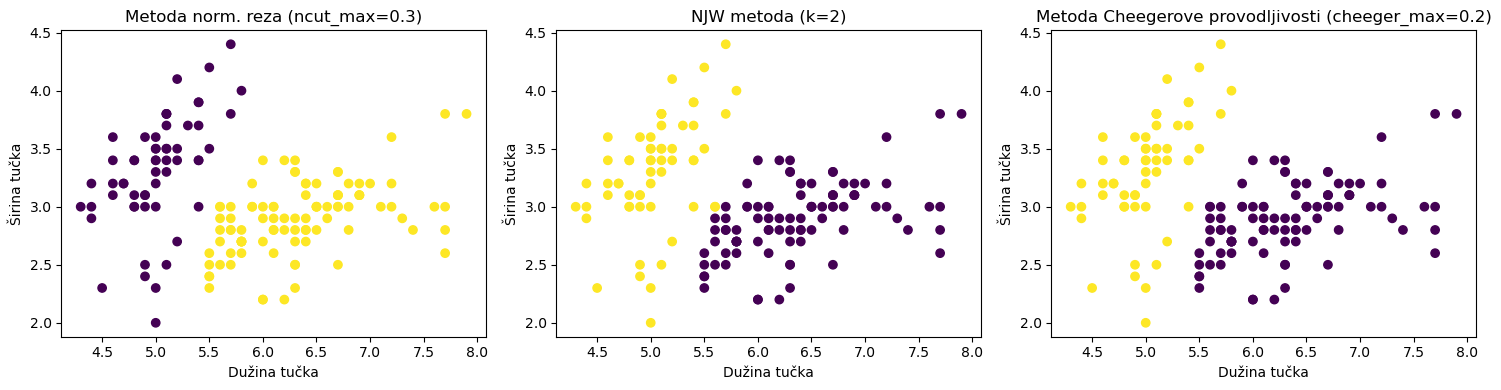

ARI:
NJW vs KVV: 0.7727
NJW vs SM : 0.8060
KVV vs SM : 0.9633

NMI:
NJW vs KVV: 0.7718
NJW vs SM : 0.7992
KVV vs SM : 0.9494


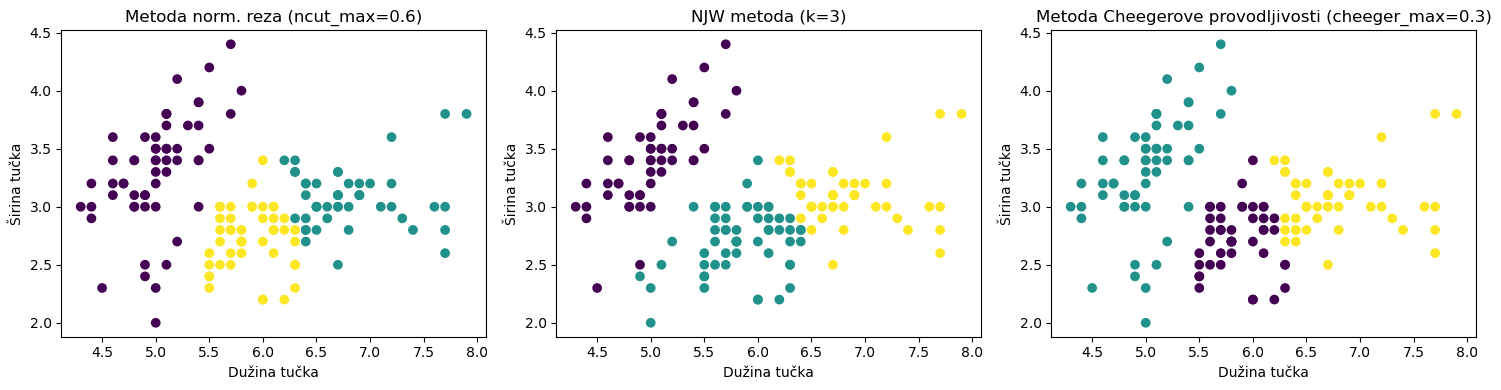

In [291]:

data = [[0.3, 2, 0.2], [0.6, 3, 0.3]]

for i, clusters in enumerate(data):
    
    """ modeli grupiranja """
    sm = SpectralClusteringSM(ncut_max=clusters[0], sigma_X=0.5)
    sm_clusters = sm.segment_2d(x_iris)

    njw = SpectralClusteringNJW(max_clusters=clusters[1], sigma_X=0.5)
    njw_clusters = njw.segment_2d(x_iris)

    kvv = SpectralClusteringKVV(
        cheeger_cond_max=clusters[2], sigma_X=0.5, adjustion="kvv_add")
    kvv_clusters = kvv.segment_2d(x_iris)

    """ ARI mjera sličnosti """
    ari_njw_kvv = adjusted_rand_score(njw_clusters[0], kvv_clusters[0])
    ari_njw_sm = adjusted_rand_score(njw_clusters[0], sm_clusters[0])
    ari_kvv_sm = adjusted_rand_score(kvv_clusters[0], sm_clusters[0])

    """ NMI mjera sličnosti """
    nmi_njw_kvv = normalized_mutual_info_score(njw_clusters[0], kvv_clusters[0])
    nmi_njw_sm = normalized_mutual_info_score(njw_clusters[0], sm_clusters[0])
    nmi_kvv_sm = normalized_mutual_info_score(kvv_clusters[0], sm_clusters[0])

    """ ispis rezultata """
    print("ARI:")
    print(f"NJW vs KVV: {ari_njw_kvv:.4f}")
    print(f"NJW vs SM : {ari_njw_sm:.4f}")
    print(f"KVV vs SM : {ari_kvv_sm:.4f}")

    print("\nNMI:")
    print(f"NJW vs KVV: {nmi_njw_kvv:.4f}")
    print(f"NJW vs SM : {nmi_njw_sm:.4f}")
    print(f"KVV vs SM : {nmi_kvv_sm:.4f}")

    """ vizualizacija rezultata """
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    axes[0].scatter(x_iris[:, 0], x_iris[:, 1], c=sm_clusters[0], cmap='viridis')
    axes[0].set_title(f'Metoda norm. reza (ncut_max={clusters[0]})')
    axes[0].set_xlabel('Dužina tučka')
    axes[0].set_ylabel('Širina tučka')

    axes[1].scatter(x_iris[:, 0], x_iris[:, 1], c=njw_clusters[0], cmap='viridis')
    axes[1].set_title(f'NJW metoda (k={clusters[1]})')
    axes[1].set_xlabel('Dužina tučka')
    axes[1].set_ylabel('Širina tučka')

    axes[2].scatter(x_iris[:, 0], x_iris[:, 1], c=kvv_clusters[0], cmap='viridis')
    axes[2].set_title(
        f'Metoda Cheegerove provodljivosti (cheeger_max={clusters[2]})')
    axes[2].set_xlabel('Dužina tučka')
    axes[2].set_ylabel('Širina tučka')
    plt.tight_layout()
    plt.show()

Slika 5.9 Rezultati grupiranja tri spektralne metode za pet skupina

ARI:
NJW vs KVV: 0.4630
NJW vs SM : 0.5058
KVV vs SM : 0.5850

NMI:
NJW vs KVV: 0.6345
NJW vs SM : 0.6572
KVV vs SM : 0.7257


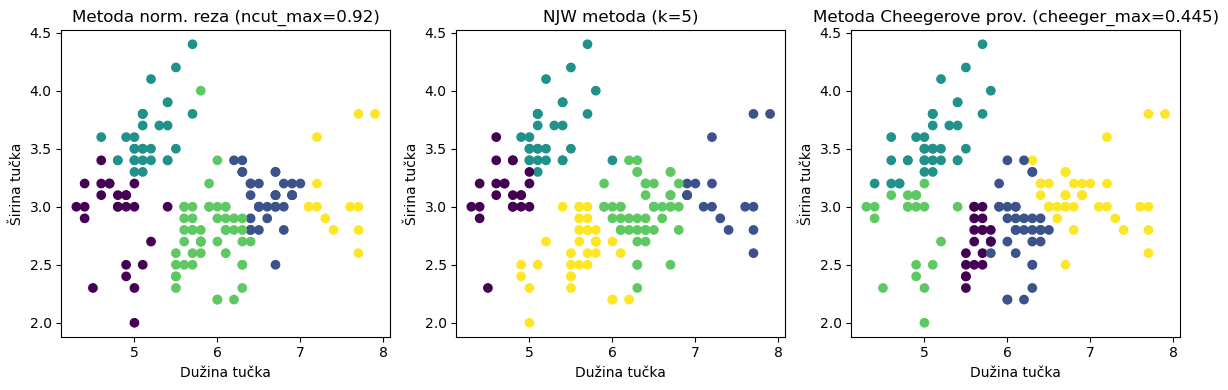

In [292]:

data = [[0.92, 5, 0.445]]

for i, clusters in enumerate(data):
    
    """ modeli grupiranja """
    sm = SpectralClusteringSM(ncut_max=clusters[0], sigma_X=1)
    sm_clusters = sm.segment_2d(x_iris)

    njw = SpectralClusteringNJW(max_clusters=clusters[1], sigma_X=1)
    njw_clusters = njw.segment_2d(x_iris)

    kvv = SpectralClusteringKVV(
        cheeger_cond_max=clusters[2], sigma_X=1, adjustion="kvv_add")
    kvv_clusters = kvv.segment_2d(x_iris)

    """ ARI mjera sličnosti """
    ari_njw_kvv = adjusted_rand_score(njw_clusters[0], kvv_clusters[0])
    ari_njw_sm = adjusted_rand_score(njw_clusters[0], sm_clusters[0])
    ari_kvv_sm = adjusted_rand_score(kvv_clusters[0], sm_clusters[0])

    """ NMI mjera sličnosti """
    nmi_njw_kvv = normalized_mutual_info_score(njw_clusters[0], kvv_clusters[0])
    nmi_njw_sm = normalized_mutual_info_score(njw_clusters[0], sm_clusters[0])
    nmi_kvv_sm = normalized_mutual_info_score(kvv_clusters[0], sm_clusters[0])

    """ ispis rezultata """
    print("ARI:")
    print(f"NJW vs KVV: {ari_njw_kvv:.4f}")
    print(f"NJW vs SM : {ari_njw_sm:.4f}")
    print(f"KVV vs SM : {ari_kvv_sm:.4f}")

    print("\nNMI:")
    print(f"NJW vs KVV: {nmi_njw_kvv:.4f}")
    print(f"NJW vs SM : {nmi_njw_sm:.4f}")
    print(f"KVV vs SM : {nmi_kvv_sm:.4f}")

    """ vizualizacija rezultata """
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].scatter(x_iris[:, 0], x_iris[:, 1], c=sm_clusters[0], cmap='viridis')
    axes[0].set_title(f'Metoda norm. reza (ncut_max={clusters[0]})')
    axes[0].set_xlabel('Dužina tučka')
    axes[0].set_ylabel('Širina tučka')

    axes[1].scatter(x_iris[:, 0], x_iris[:, 1], c=njw_clusters[0], cmap='viridis')
    axes[1].set_title(f'NJW metoda (k={clusters[1]})')
    axes[1].set_xlabel('Dužina tučka')
    axes[1].set_ylabel('Širina tučka')

    axes[2].scatter(x_iris[:, 0], x_iris[:, 1], c=kvv_clusters[0], cmap='viridis')
    axes[2].set_title(
        f'Metoda Cheegerove prov. (cheeger_max={clusters[2]})')
    axes[2].set_xlabel('Dužina tučka')
    axes[2].set_ylabel('Širina tučka')
    plt.tight_layout()
    plt.show()

## 6. Primjena

### 6.1. Segmentacija slika


Slika 6.1 Utjecaj ulaznih parametara na rezultate segmentacija slika

In [293]:
def visualize_line_sigma_I(image_name, values, custom):
    fig, axs = plt.subplots(1, len(values) + 1, figsize=(15, 3))

    clusterer = SpectralClusteringSM(
        sigma_I=0.1, sigma_X=5.0, r=10, lanczos_k=30, l=10, ncut_max=0.3)
    clusterer.load_image(image_name)

    axs[0].imshow(clusterer.img, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    for idx, n in enumerate(values):
        clusterer = SpectralClusteringSM(
            sigma_I=n, sigma_X=100, r=10, lanczos_k=10, l=10, ncut_max=0.7)
        clusterer.load_image(image_name)
        segmented = clusterer.segment_image()
        if custom == True:
            # ------------------------------------------------------  custom set boja ----------------------------
            cmap_custom = clusterer.average_color()
            axs[idx + 1].imshow(segmented, cmap=cmap_custom)
        else:
            axs[idx + 1].imshow(segmented, cmap='gray')
        axs[idx + 1].set_title(f'Segm (sigma_I={n})')
        axs[idx + 1].axis('off')

    plt.tight_layout()
    plt.show()

(ovisnost o parametru sigma_I)


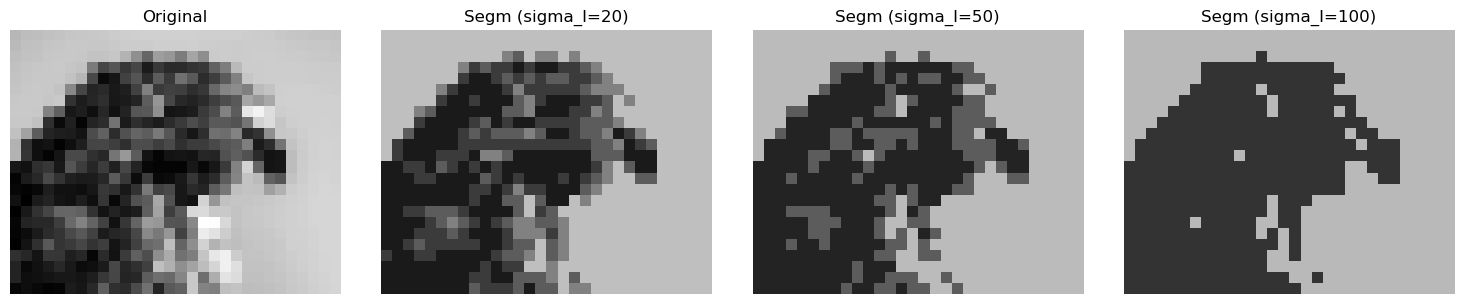

In [294]:
print('(ovisnost o parametru sigma_I)')
visualize_line_sigma_I('images/eagle_30px.png', [20, 50, 100], True)

In [295]:
def visualize_line_sigma_X(image_name, values, custom):
    fig, axs = plt.subplots(1, len(values) + 1, figsize=(15, 3))

    clusterer = SpectralClusteringSM(
        sigma_I=0.1, sigma_X=5.0, r=10, lanczos_k=30, l=10, ncut_max=0.3)
    clusterer.load_image(image_name)

    axs[0].imshow(clusterer.img, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    for idx, n in enumerate(values):
        clusterer = SpectralClusteringSM(
            sigma_I=20, sigma_X=n, r=10, lanczos_k=10, l=10, ncut_max=0.7)
        clusterer.load_image(image_name)
        segmented = clusterer.segment_image()
        if custom == True:
            # ------------------------------------------------------  custom set boja ----------------------------
            cmap_custom = clusterer.average_color()
            axs[idx + 1].imshow(segmented, cmap=cmap_custom)
        else:
            axs[idx + 1].imshow(segmented, cmap='gray')
        axs[idx + 1].set_title(f'Segm (sigma_X={n})')
        axs[idx + 1].axis('off')

    plt.tight_layout()
    plt.show()

(ovisnost o parametru σ_X)


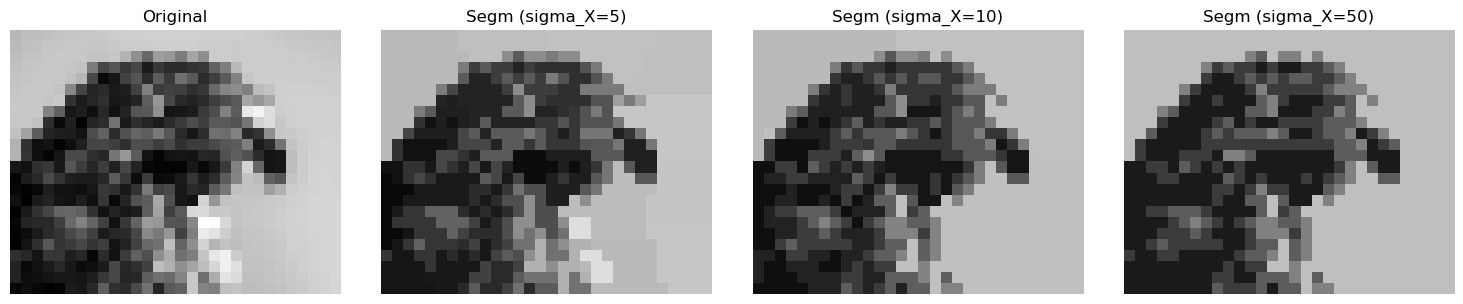

In [296]:
print('(ovisnost o parametru σ_X)')
visualize_line_sigma_X('images/eagle_30px.png', [5, 10, 50], True)

In [297]:
def visualize_line_r(image_name, values, custom):
    fig, axs = plt.subplots(1, len(values) + 1, figsize=(15, 3))

    clusterer = SpectralClusteringSM(
        sigma_I=0.1, sigma_X=5.0, r=10, lanczos_k=30, l=10, ncut_max=0.3)
    clusterer.load_image(image_name)

    axs[0].imshow(clusterer.img, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    for idx, n in enumerate(values):
        clusterer = SpectralClusteringSM(
            sigma_I=50, sigma_X=100, r=n, lanczos_k=10, l=10, ncut_max=0.7)
        clusterer.load_image(image_name)
        segmented = clusterer.segment_image()
        if custom == True:
            # ------------------------------------------------------  custom set boja ----------------------------
            cmap_custom = clusterer.average_color()
            axs[idx + 1].imshow(segmented, cmap=cmap_custom)
        else:
            axs[idx + 1].imshow(segmented, cmap='gray')
        axs[idx + 1].set_title(f'Segm (r={n})')
        axs[idx + 1].axis('off')

    plt.tight_layout()
    plt.show()

ovisnost o parametru r


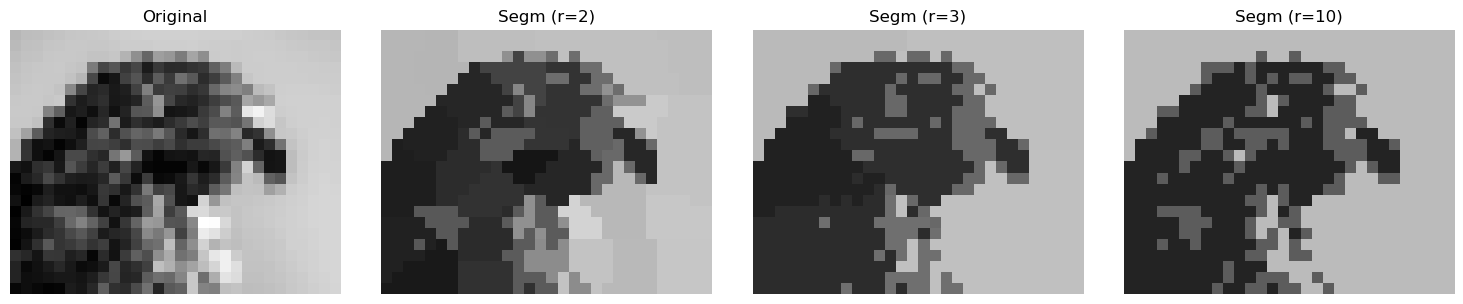

In [298]:
print('ovisnost o parametru r')
visualize_line_r('images/eagle_30px.png', [2, 3, 10], True)

Slika 6.2 Segmentacija slika pomoću metode normaliziranog reza

In [299]:
def visualize_line(image_name, values, custom):
    fig, axs = plt.subplots(1, len(values) + 1, figsize=(20, 4))

    clusterer = SpectralClusteringSM(
        sigma_I=0.1, sigma_X=5.0, r=10, lanczos_k=30, l=10, ncut_max=0.3)
    clusterer.load_image(image_name)

    axs[0].imshow(clusterer.img, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    for idx, n in enumerate(values):
        clusterer = SpectralClusteringSM(
            sigma_I=50, sigma_X=100, r=10, lanczos_k=10, l=10, ncut_max=n)
        clusterer.load_image(image_name)
        segmented = clusterer.segment_image()
        if custom == True:
            # ------------------------------------------------------  custom set boja ----------------------------
            cmap_custom = clusterer.average_color()
            axs[idx + 1].imshow(segmented, cmap=cmap_custom)
        else:
            axs[idx + 1].imshow(segmented, cmap='gray')
        axs[idx + 1].set_title(f'Segm (n_cut={n})')
        axs[idx + 1].axis('off')

    plt.tight_layout()
    plt.show()

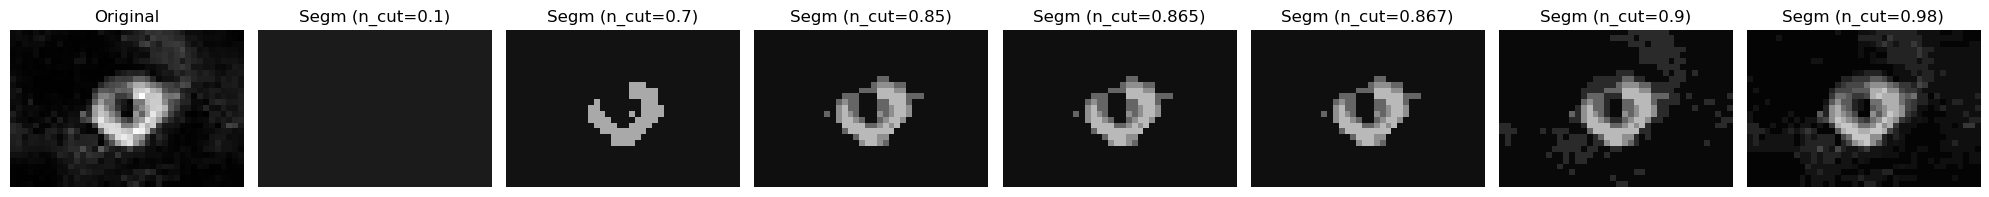

In [300]:
visualize_line('images/eye_40px.png',
               [0.1, 0.7, 0.85, 0.865, 0.867, 0.9, 0.98], True)

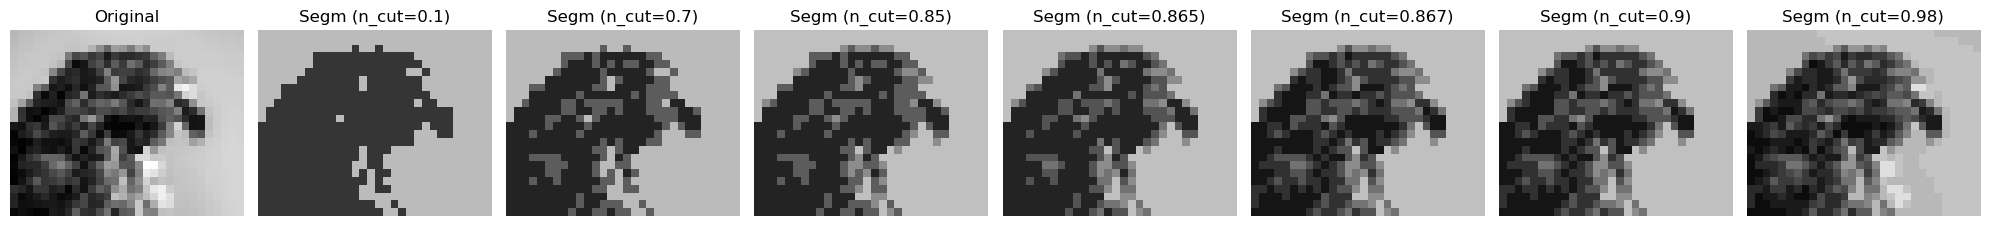

In [301]:
visualize_line('images/eagle_30px.png',
               [0.1, 0.7, 0.85, 0.865, 0.867, 0.9, 0.98], True)

In [302]:
def visualize_line_NJW(image_name, values, custom):
    fig, axs = plt.subplots(1, len(values) + 1, figsize=(20, 4))

    clusterer = SpectralClusteringNJW(
        sigma_I=0.1, sigma_X=5.0, r=10, max_clusters=1)
    clusterer.load_image(image_name)

    axs[0].imshow(clusterer.img, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    for idx, m in enumerate(values):
        clusterer = SpectralClusteringNJW(
            sigma_I=50, sigma_X=100, r=20, max_clusters=m)
        clusterer.load_image(image_name)
        segmented = clusterer.segment_image()
        # ------------------------------------------------------  custom set boja ----------------------------
        if custom:
            cmap_custom = clusterer.average_color()
            axs[idx + 1].imshow(segmented, cmap=cmap_custom)
        else:
            axs[idx + 1].imshow(segmented, cmap='gray')
        axs[idx + 1].set_title(f'Segm.(max_cluster={m})')
        axs[idx + 1].axis('off')

    plt.tight_layout()
    plt.show()

custom boje


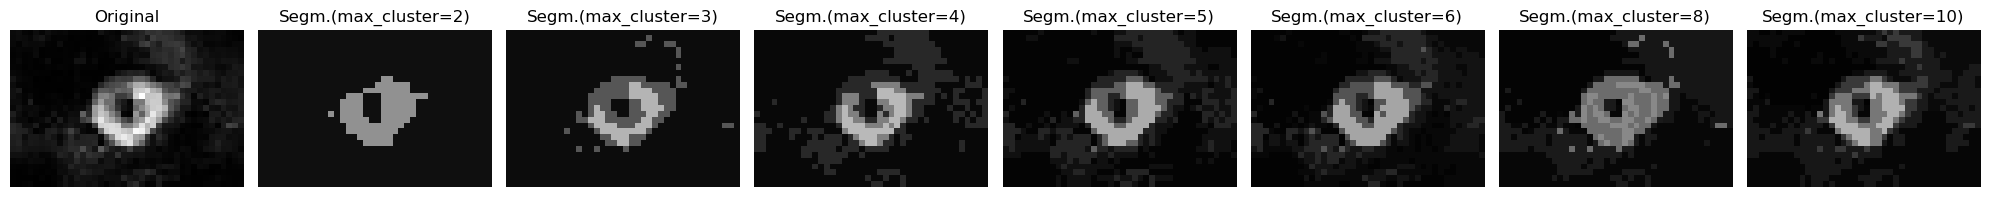

In [303]:
print('custom boje')
visualize_line_NJW('images/eye_40px.png', [2, 3, 4, 5, 6, 8, 10], True)

custom boje


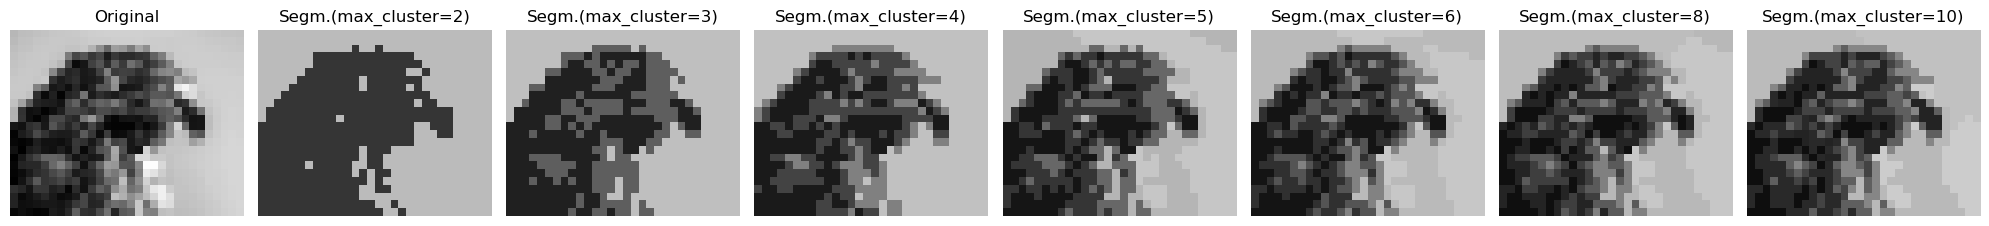

In [304]:
print('custom boje')
visualize_line_NJW('images/eagle_30px.png', [2, 3, 4, 5, 6, 8, 10], True)

Slika 6.4 Segmentacija slika pomoću metode reza prema Cheegerovoj provodljivosti

In [305]:
def visualize_line_KVV(image_name, values, custom, adjustion):
    fig, axs = plt.subplots(1, len(values) + 1, figsize=(20, 4))

    clusterer = SpectralClusteringKVV(
        sigma_I=0.1, sigma_X=5.0, r=10, lanczos_k=30, l=10, cheeger_cond_max=0.3, adjustion=adjustion)
    clusterer.load_image(image_name)

    axs[0].imshow(clusterer.img, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    for idx, n in enumerate(values):
        clusterer = SpectralClusteringKVV(
            sigma_I=50, sigma_X=100, r=10, lanczos_k=10, l=10, cheeger_cond_max=n, adjustion=adjustion)
        clusterer.load_image(image_name)
        segmented = clusterer.segment_image()
        if custom == True:
            # ------------------------------------------------------  custom set boja ----------------------------
            cmap_custom = clusterer.average_color()
            axs[idx + 1].imshow(segmented, cmap=cmap_custom)
        else:
            axs[idx + 1].imshow(segmented, cmap='gray')
        axs[idx + 1].set_title(f'Segm (n_cut={n})')
        axs[idx + 1].axis('off')

    plt.tight_layout()
    plt.show()

Metoda normaliziranja množenjem


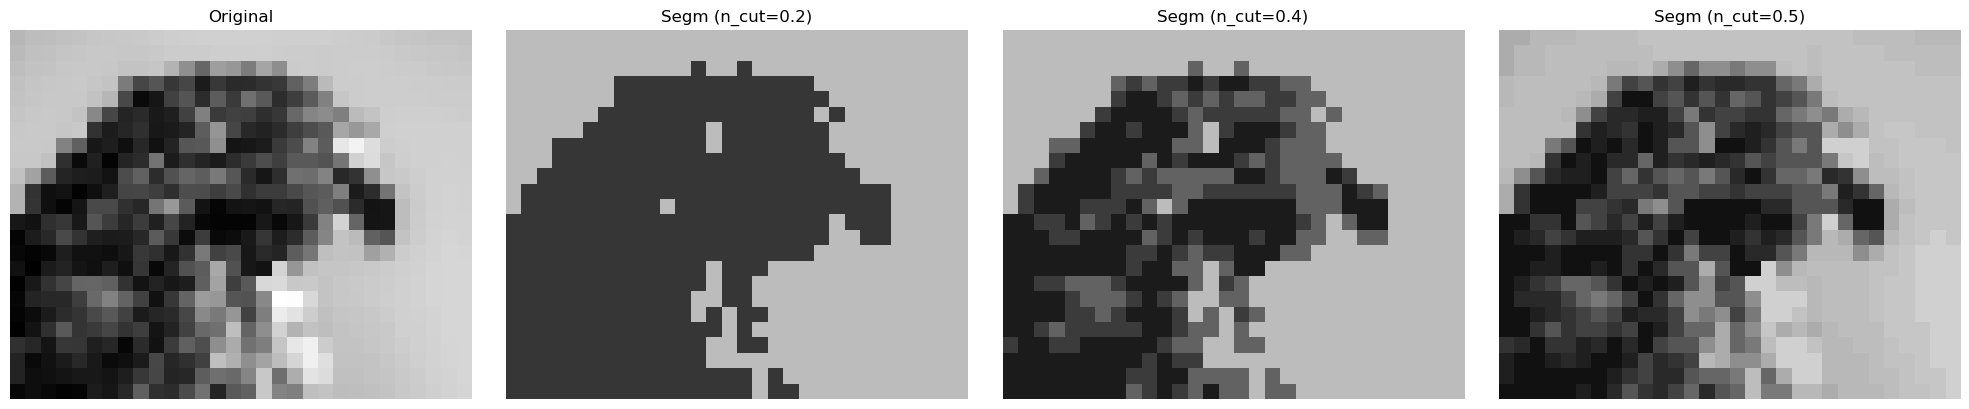

In [306]:
print('Metoda normaliziranja množenjem')
visualize_line_KVV('images/eagle_30px.png', [0.2, 0.4, 0.5], True, "kvv_add")

metoda normaliziranja množenjem


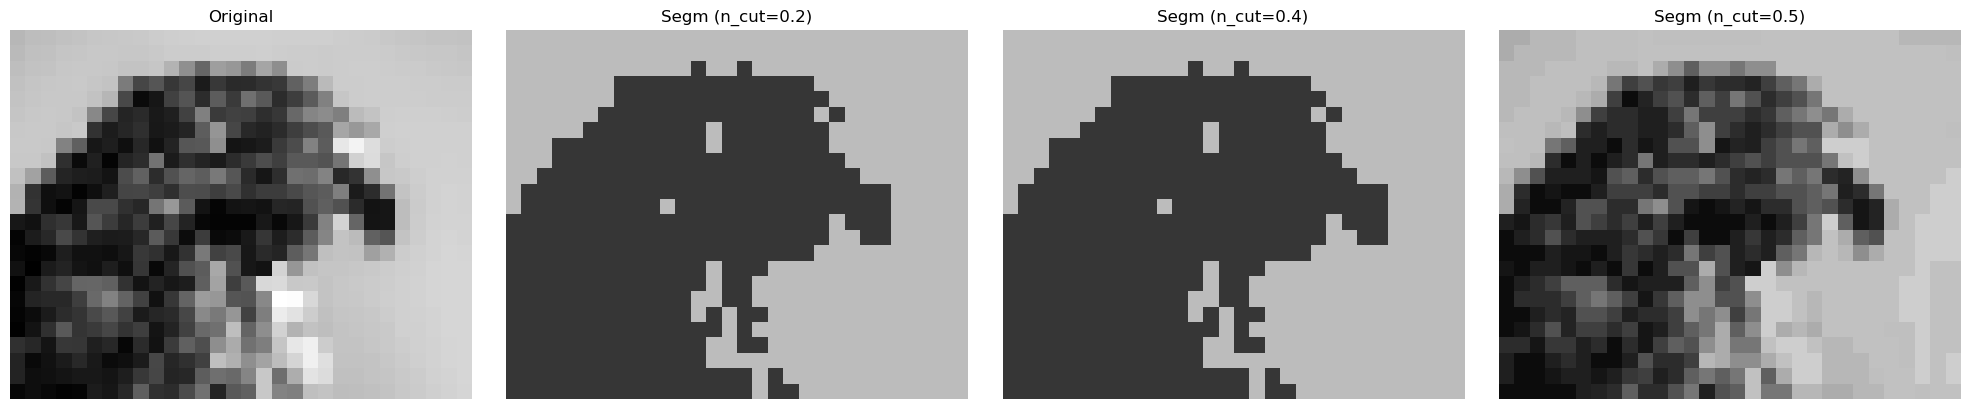

In [307]:
print('metoda normaliziranja množenjem')
visualize_line_KVV('images/eagle_30px.png', [0.2, 0.4, 0.5], True, "kvv_mult")

### 6.2. Grupiranje višedimenzionalnih podataka

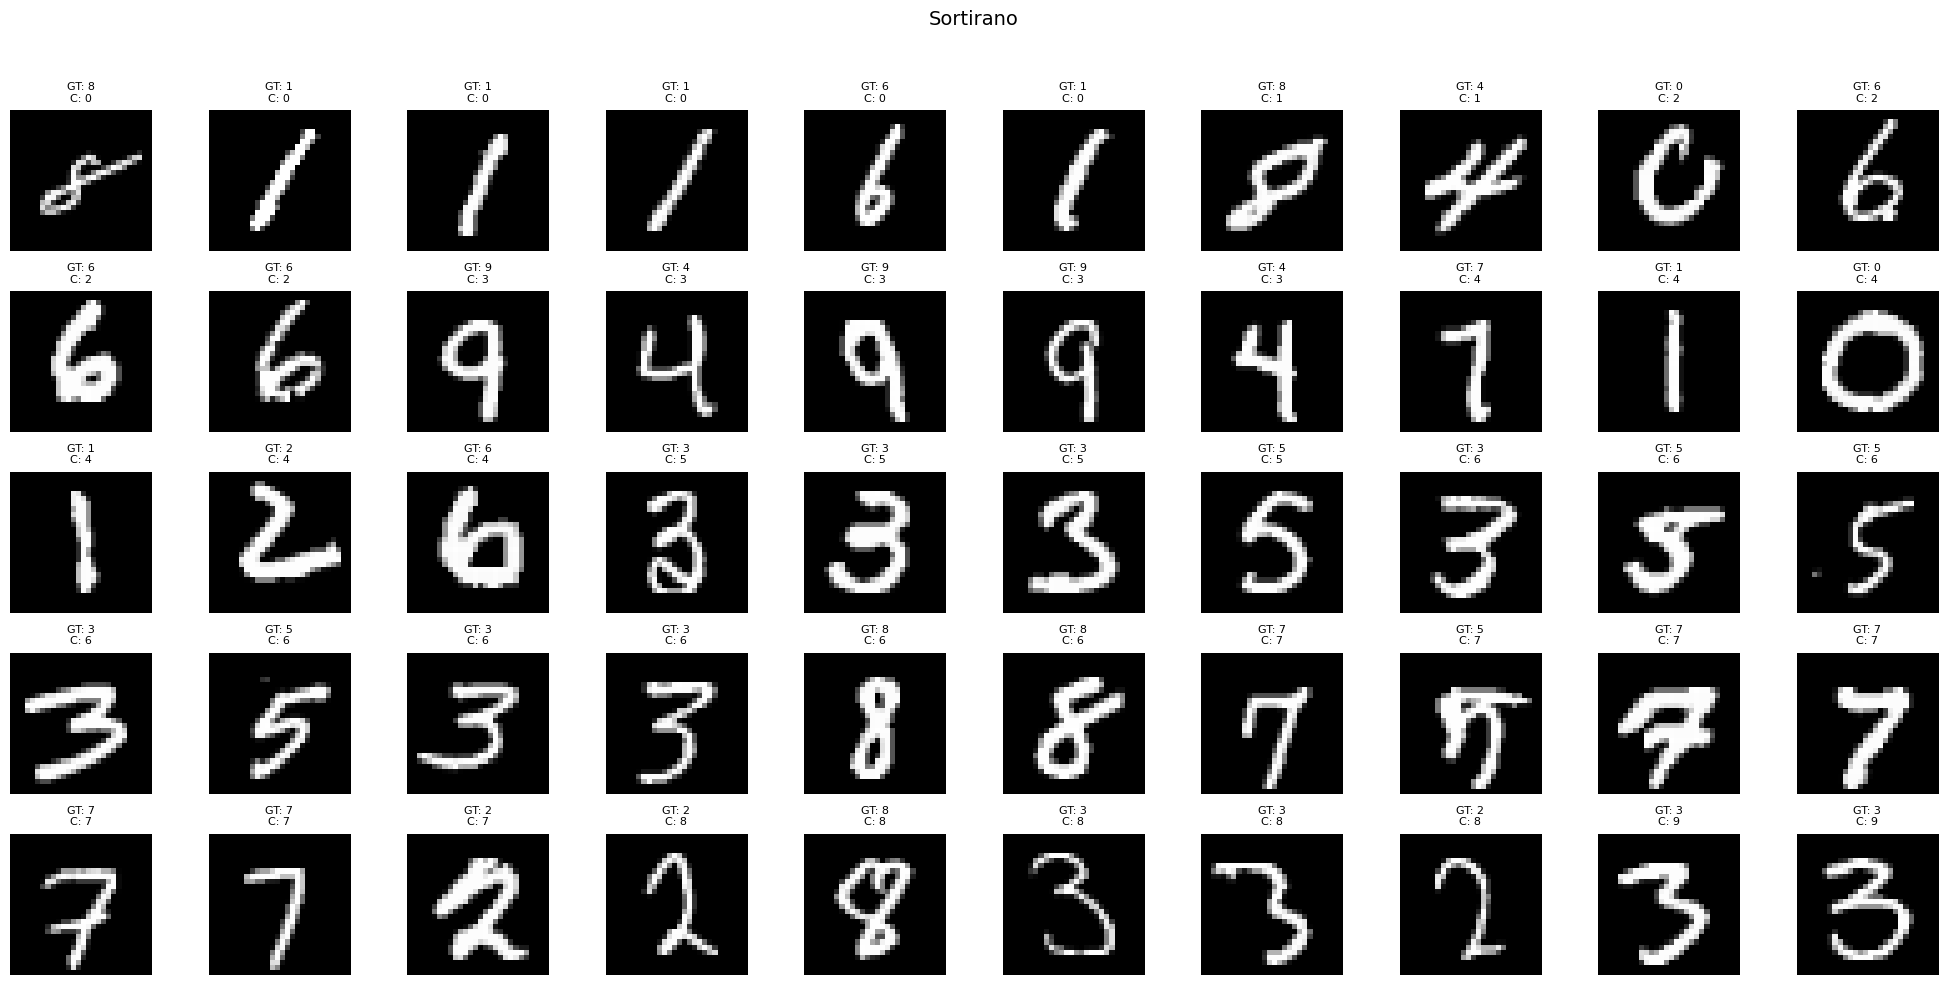

In [308]:
""" odabir nasumično 50 slika iz MNIST skupa podataka """
mnist = fetch_openml('mnist_784', version=1)
X_minst = mnist.data.astype(np.float32) / 255.0
y_minst = mnist.target.astype(int)
indices = [41792, 36424, 49493, 4916, 44709, 31162, 48051, 12045, 6990, 36936, 2784, 52971,
           36868, 27570, 56776, 63232, 7209, 66550, 32316, 35726, 57661, 35190, 64179, 66194,
           59291, 28726, 2450, 11169, 51596, 59760, 69193, 15374, 36851, 15402, 28953, 26778,
           23156, 48458, 47537, 6298, 25121, 4311, 24975, 36059, 30147, 59549, 7314, 54678,
           30275, 14752]
points = X_minst.iloc[indices].to_numpy()
labels = y_minst.iloc[indices].to_numpy()

""" model grupiranja """
sc = SpectralClusteringSM(sigma_X=2, ncut_max=0.72)
clusters = sc.segment_nd(points,similarity_type='gauss')
clusters = clusters[0] if isinstance(clusters, tuple) else clusters
n_clusters = len(np.unique(clusters))

""" sortiranje grupiranim rezultata """
sorted_indices = np.argsort(clusters)
sorted_points = points[sorted_indices]
sorted_labels = labels[sorted_indices]
sorted_clusters = clusters[0][sorted_indices]

""" vizualizacija rezultata """
n_display = 50
n_cols = 10
n_rows = int(np.ceil(n_display / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(2 * n_cols, 2 * n_rows))
axes = axes.flatten()

if sorted_points.shape[1] != 784:
    sorted_points = sorted_points.reshape(-1, 784)
for i in range(n_display):
    ax = axes[i]
    image = sorted_points[i].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(
        f"GT: {sorted_labels[0][i]}\nC: {sorted_clusters[0][i]}", fontsize=8)
    ax.axis('off')

plt.suptitle(f"Sortirano", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

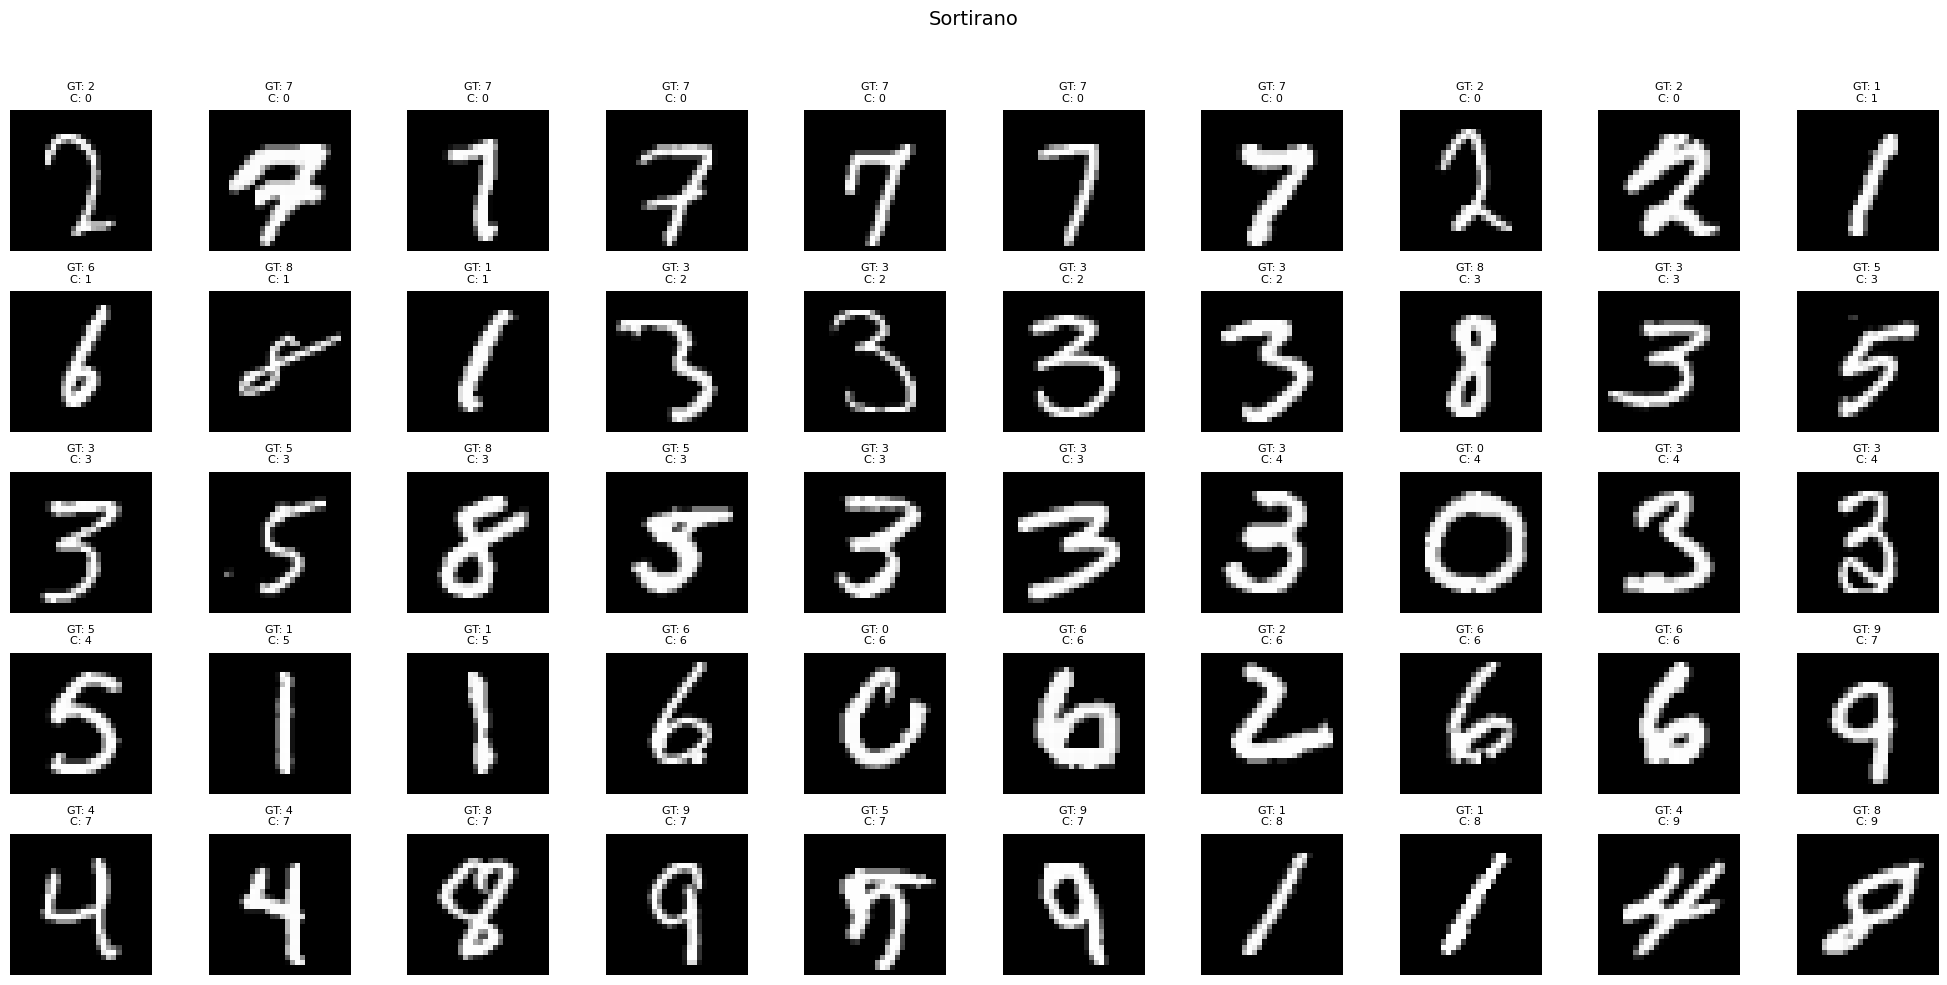

In [309]:
""" odabir nasumično 50 slika iz MNIST skupa podataka """
mnist = fetch_openml('mnist_784', version=1)
X_minst = mnist.data.astype(np.float32) / 255.0
y_minst = mnist.target.astype(int)
indices = [41792, 36424, 49493, 4916, 44709, 31162, 48051, 12045, 6990, 36936, 2784, 52971,
           36868, 27570, 56776, 63232, 7209, 66550, 32316, 35726, 57661, 35190, 64179, 66194,
           59291, 28726, 2450, 11169, 51596, 59760, 69193, 15374, 36851, 15402, 28953, 26778,
           23156, 48458, 47537, 6298, 25121, 4311, 24975, 36059, 30147, 59549, 7314, 54678,
           30275, 14752]
points = X_minst.iloc[indices].to_numpy()
labels = y_minst.iloc[indices].to_numpy()

""" model grupiranja """
sc = SpectralClusteringNJW(sigma_X=1, max_clusters=10)
clusters = sc.segment_3d(points)
clusters = clusters[0] if isinstance(clusters, tuple) else clusters
n_clusters = len(np.unique(clusters))

""" sortiranje grupiranim rezultata """
sorted_indices = np.argsort(clusters)
sorted_points = points[sorted_indices]
sorted_labels = labels[sorted_indices]
sorted_clusters = clusters[0][sorted_indices]

""" vizualizacija rezultata """
n_display = 50
n_cols = 10
n_rows = int(np.ceil(n_display / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(2 * n_cols, 2 * n_rows))
axes = axes.flatten()

if sorted_points.shape[1] != 784:
    sorted_points = sorted_points.reshape(-1, 784)
for i in range(n_display):
    ax = axes[i]
    image = sorted_points[i].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(
        f"GT: {sorted_labels[0][i]}\nC: {sorted_clusters[0][i]}", fontsize=8)
    ax.axis('off')

plt.suptitle(f"Sortirano", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

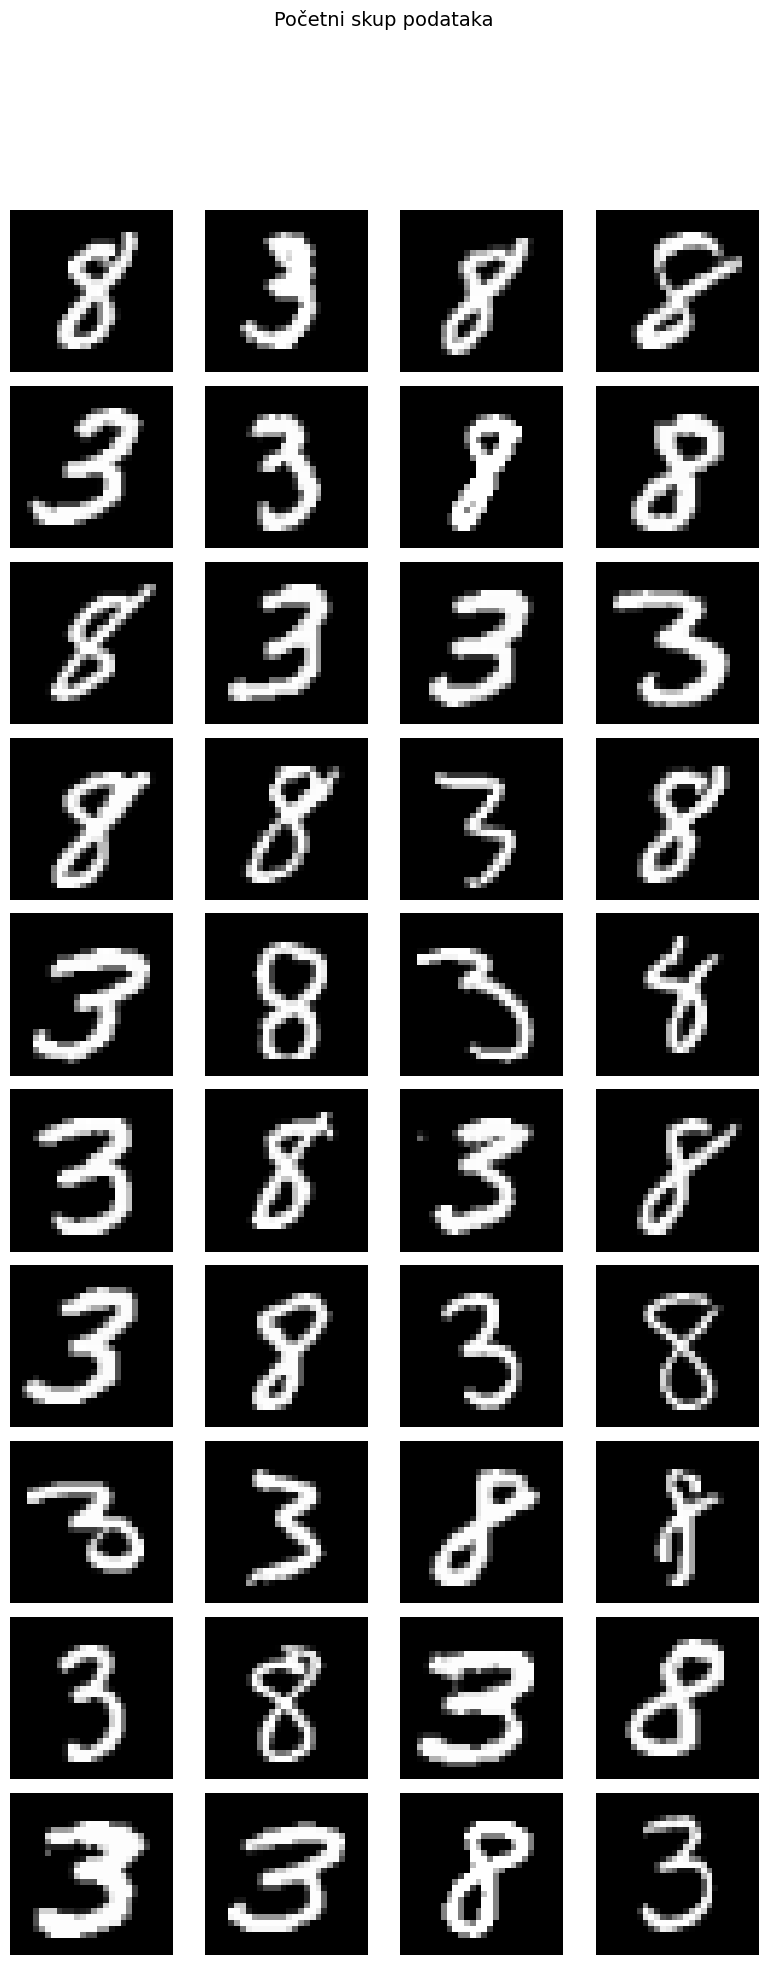

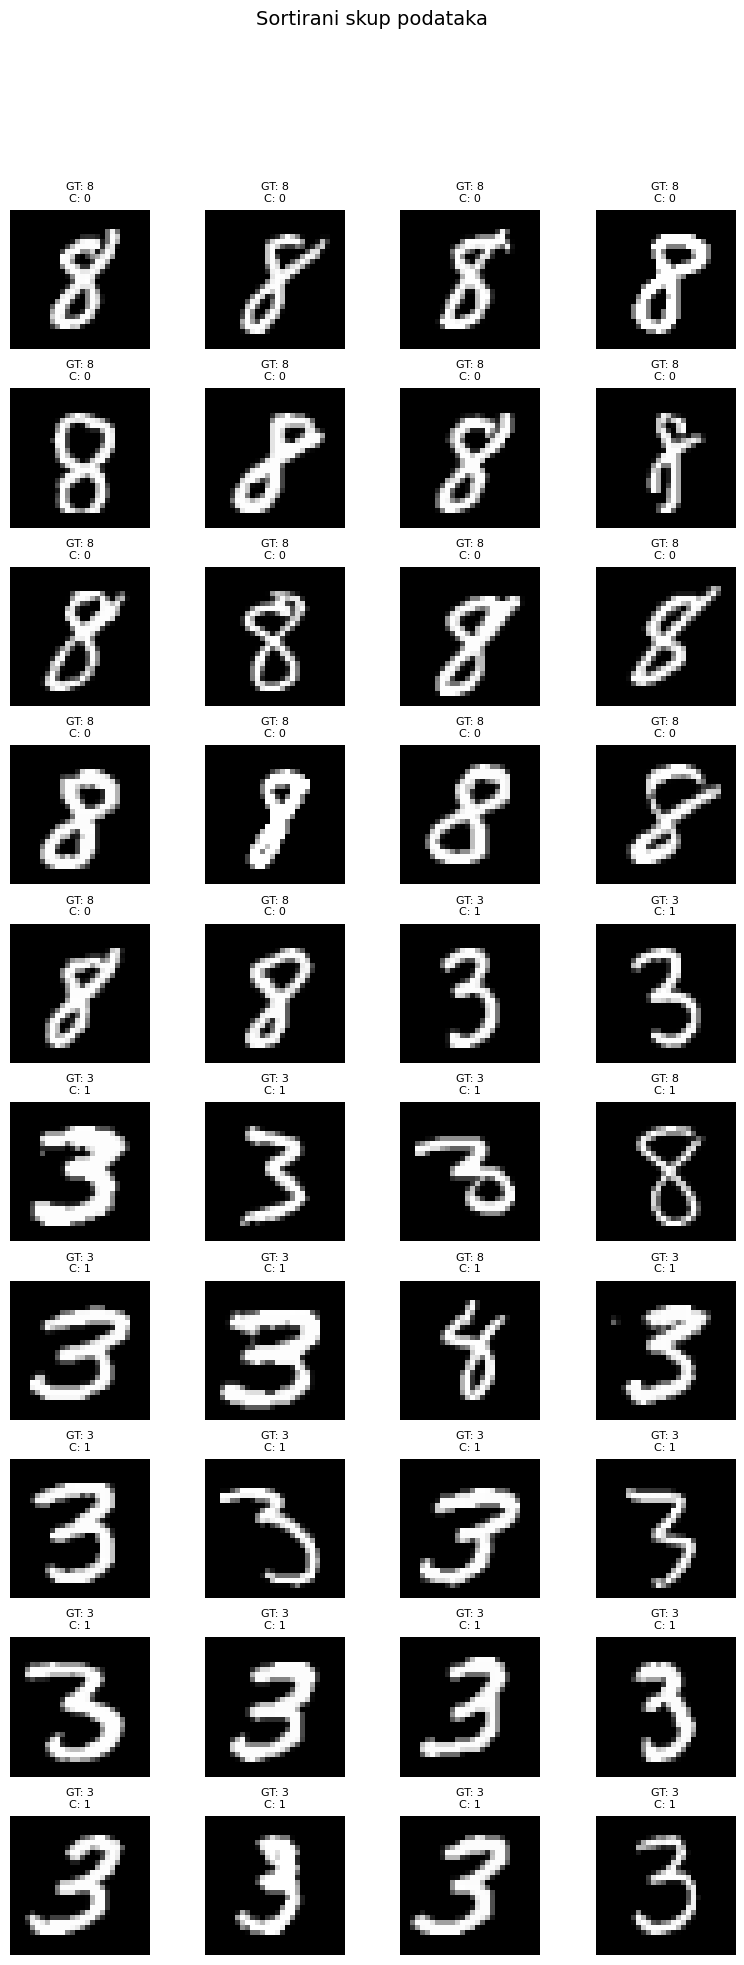

In [310]:
"""priprema podataka za MNIST skup podataka: znamenke 3 i 8"""

indices_2 = np.where(y_minst == 3)[0][:20]
indices_1 = np.where(y_minst == 8)[0][:20]
indices = np.concatenate((indices_1, indices_2))
np.random.shuffle(indices)
points = X_minst.iloc[indices].to_numpy()
labels = y_minst.iloc[indices].to_numpy()

""" model grupiranja """
sc = SpectralClusteringNJW(sigma_X=1, max_clusters=2)
clusters = sc.segment_3d(points)
clusters = clusters[0] if isinstance(clusters, tuple) else clusters
n_clusters = len(np.unique(clusters))

""" sortiranje grupiranim rezultata """
sorted_indices = np.argsort(clusters)
sorted_points = points[sorted_indices]
sorted_labels = labels[sorted_indices]
sorted_clusters = clusters[0][sorted_indices]

""" postavke za vizualizaciju """
n_display = len(indices)
n_cols = 4
n_rows = int(np.ceil(n_display / n_cols))

""" vizualizacija početnih podataka """
fig, axes = plt.subplots(n_rows, n_cols, figsize=(2 * n_cols, 2 * n_rows))
axes = axes.flatten()

if sorted_points.shape[1] != 784:
    sorted_points = sorted_points.reshape(-1, 784)

for i in range(n_display):
    ax = axes[i]
    image = points[i].reshape(28, 28)
    ax.imshow(image, cmap="gray")
    ax.axis("off")

plt.suptitle(f"Početni skup podataka", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

""" vizualizacija sortiranih podataka """
fig, axes = plt.subplots(n_rows, n_cols, figsize=(2 * n_cols, 2 * n_rows))
axes = axes.flatten()

if sorted_points.shape[1] != 784:
    sorted_points = sorted_points.reshape(-1, 784)

for i in range(n_display):
    ax = axes[i]
    image = sorted_points[i].reshape(28, 28)
    ax.imshow(image, cmap="gray")
    ax.set_title(f"GT: {sorted_labels[0][i]}\nC: {sorted_clusters[0][i]}", fontsize=8)
    ax.axis("off")

plt.suptitle(f"Sortirani skup podataka", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()